In [1]:
# all the imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# upload the file smallfile_pharmacy.xlsx
df = pd.read_excel('smallfile_pharmacy.xlsx')



In [3]:
df.head()

,pharmacy_id,visit_id,visit_DT,medication_pharmacy_name,time_from_visit_to_nurse,from_nurse_to_pharmacy,from_pharmacy_till_mstart_making,from_making_till_printing,from_printing_till_giving,1,2,3,4,5,visit_date,visit_hour,visit_hour_formatted
0,500426,14439857,2022-01-18 11:06:03.643,Zomera 4mg,1900-01-14 00:00:00.000,2022-01-18 09:04:36.707,2022-01-18 09:04:14.440,2022-01-18 09:09:56.637,2022-01-18 12:29:32.730,-6.417283e+07,6.417270e+07,-0.371117,5.703283,199.601550,2022-01-18,11,11:00
1,31145,14431205,2022-01-19 08:42:08.227,Ebetaxel 100mg INJ,NaT,2022-01-19 10:21:05.343,2022-01-19 10:37:24.943,2022-01-19 10:57:27.353,2022-01-19 11:30:00.000,NaN,NaN,16.326667,20.040167,32.544117,2022-01-19,8,08:00
2,2531239,14428966,2022-01-19 12:18:31.183,MK-1308A,NaT,2022-01-19 14:23:50.943,2022-01-19 14:52:12.113,NaT,2022-01-19 15:53:45.943,NaN,NaN,28.352833,NaN,NaN,2022-01-19,12,12:00
3,412009,14459265,2022-01-20 09:26:22.677,Campto 100mg,2022-01-20 10:45:12.700,2022-01-20 11:20:24.453,2022-01-20 11:51:18.360,2022-01-20 11:55:33.770,2022-01-20 10:20:00.000,7.883372e+01,3.519588e+01,30.898450,4.256833,-95.562833,2022-01-20,9,09:00
4,412009,14459265,2022-01-20 09:26:22.677,Fluorouracil 5000 mg,2022-01-20 10:45:12.700,2022-01-20 11:20:02.170,2022-01-20 11:50:19.233,2022-01-20 11:55:33.770,2022-01-20 12:20:00.000,7.883372e+01,3.482450e+01,30.284383,5.242283,24.437167,2022-01-20,9,09:00


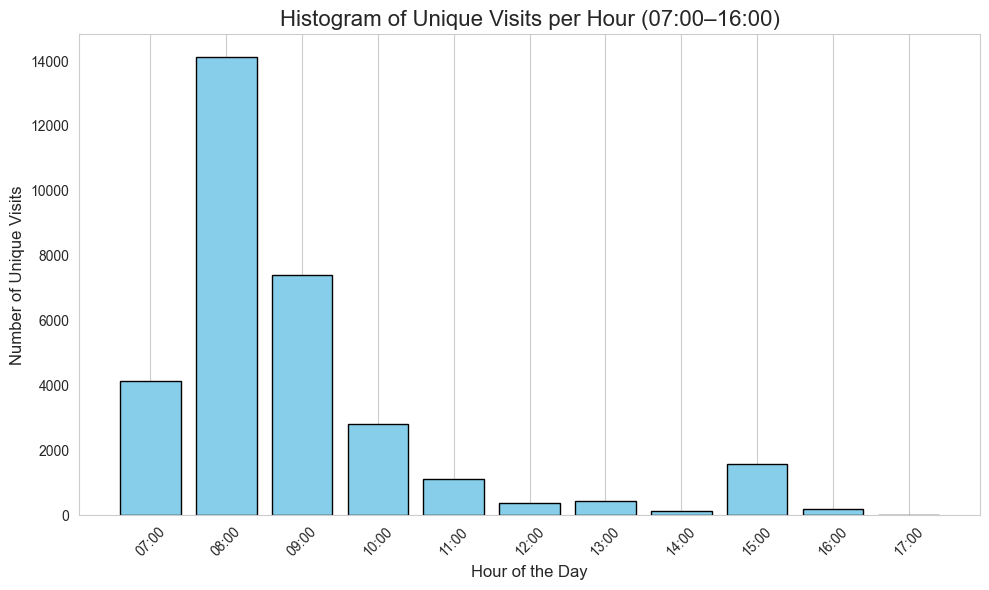

In [4]:
# show histogram of unique visits (unique visit_id) per hour (07:00 to 18:00)
# Filter data for hours between 07:00 and 18:00
df['visit_hour'] = pd.to_datetime(df['visit_DT']).dt.hour
filtered_df = df[df['visit_hour'].between(7, 18)]

# Count unique visits per hour
unique_visits_per_hour = filtered_df.groupby('visit_hour')['visit_id'].nunique()

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.bar(unique_visits_per_hour.index, unique_visits_per_hour.values, color='skyblue', edgecolor='black')
plt.title("Histogram of Unique Visits per Hour (07:00–16:00)", fontsize=16)
plt.xlabel("Hour of the Day", fontsize=12)
plt.ylabel("Number of Unique Visits", fontsize=12)
plt.xticks(unique_visits_per_hour.index, [f"{h:02d}:00" for h in unique_visits_per_hour.index], rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()



In [5]:
# distribution of number of unique visits (visit_id) per patient (patient_id)

5000 rows - filtered data without negative step durations


In [6]:
# remove rows with negative step durations
df2 = df[(df['1'] >= 0) & (df['2'] >= 0) & (df['3'] >= 0) & (df['4'] >= 0)& (df['5'] >= 0)]


C:\Users\dani9\AppData\Local\Temp\ipykernel_27548\4263071816.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['visit_hour'] = pd.to_datetime(df2['visit_DT']).dt.hour


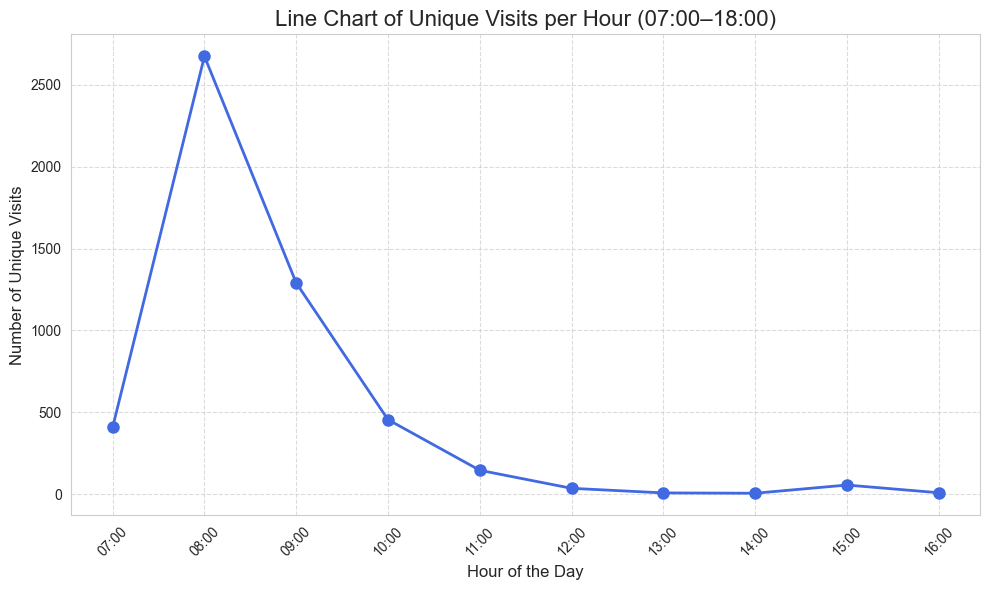

In [7]:
# Show line plot of unique visits per hour (07:00 to 18:00) using df2
# Filter data for hours between 07:00 and 18:00
df2['visit_hour'] = pd.to_datetime(df2['visit_DT']).dt.hour
filtered_df2 = df2[df2['visit_hour'].between(7, 18)]

# Count unique visits per hour
unique_visits_per_hour = filtered_df2.groupby('visit_hour')['visit_id'].nunique()

# Plot the line chart
plt.figure(figsize=(10, 6))
plt.plot(unique_visits_per_hour.index, unique_visits_per_hour.values,
         marker='o', linewidth=2, color='royalblue', markersize=8)
plt.title("Line Chart of Unique Visits per Hour (07:00–18:00)", fontsize=16)
plt.xlabel("Hour of the Day", fontsize=12)
plt.ylabel("Number of Unique Visits", fontsize=12)
plt.xticks(unique_visits_per_hour.index, [f"{h:02d}:00" for h in unique_visits_per_hour.index], rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [8]:
# number of unique visits (visit_id) in df2 and df
print(f"Number of unique visits in df2: {df2['visit_id'].nunique()}")
print(f"Number of unique visits in df: {df['visit_id'].nunique()}")

Number of unique visits in df2: 5096
Number of unique visits in df: 32284


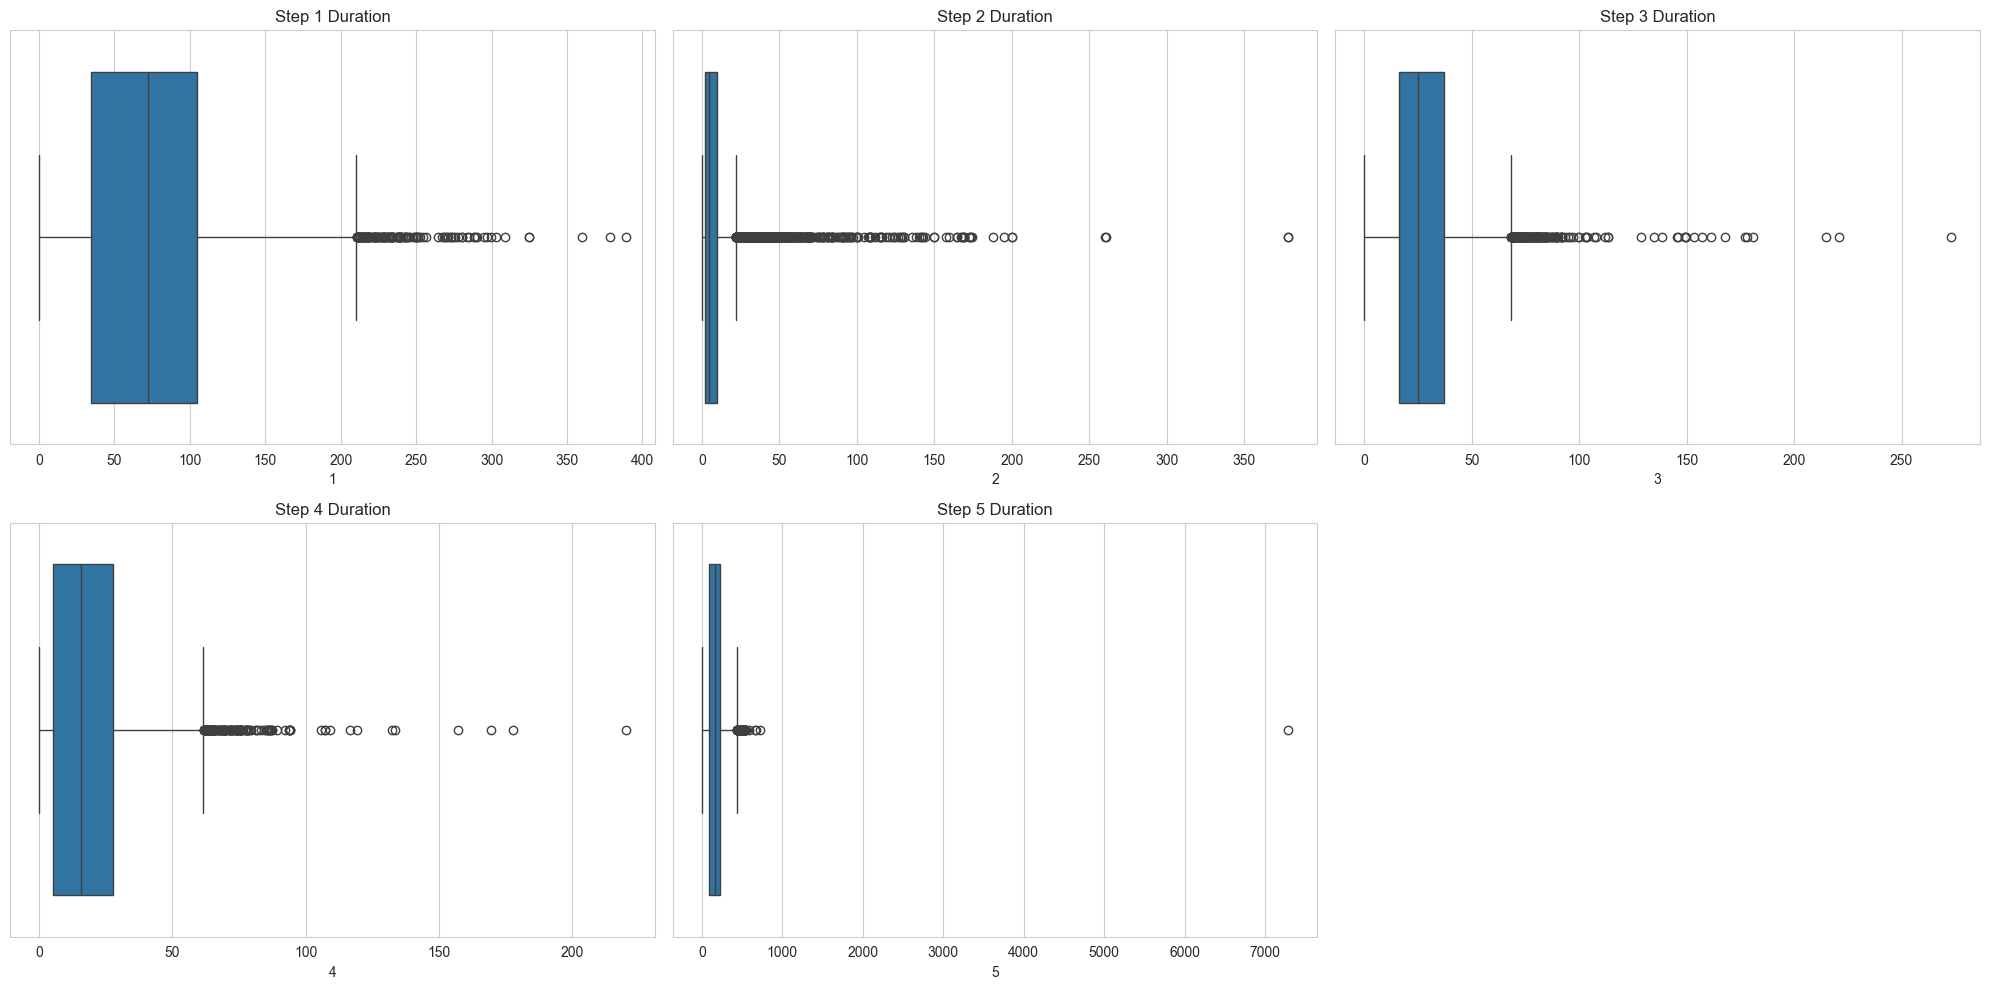

In [9]:
# 5 plots of boxplot 1-5 from df2
plt.figure(figsize=(20, 10))
plt.subplot(2, 3, 1)
sns.boxplot(x=df2['1'])
plt.title('Step 1 Duration')
plt.subplot(2, 3, 2)
sns.boxplot(x=df2['2'])
plt.title('Step 2 Duration')
plt.subplot(2, 3, 3)
sns.boxplot(x=df2['3'])
plt.title('Step 3 Duration')
plt.subplot(2, 3, 4)
sns.boxplot(x=df2['4'])
plt.title('Step 4 Duration')
plt.subplot(2, 3, 5)
sns.boxplot(x=df2['5'])
plt.title('Step 5 Duration')
plt.tight_layout()
plt.show()





In [10]:
# remove outliers that exceed 500 minutes for steps 1-5
df2 = df2[(df2['1'] <= 500) & (df2['2'] <= 500) & (df2['3'] <= 500) & (df2['4'] <= 500)& (df2['5'] <= 500)]



In [11]:
df2.describe()

,pharmacy_id,visit_id,visit_DT,time_from_visit_to_nurse,from_nurse_to_pharmacy,from_pharmacy_till_mstart_making,from_making_till_printing,from_printing_till_giving,1,2,3,4,5,visit_date,visit_hour
count,7.754000e+03,7.754000e+03,7754,7754,7754,7754,7754,7754,7754.000000,7754.000000,7754.000000,7754.000000,7754.000000,7754,7754.000000
mean,1.204374e+06,1.553848e+07,2023-03-12 09:56:30.012974080,2023-03-12 11:11:55.975250176,2023-03-12 11:21:49.360684288,2023-03-12 11:50:08.279745024,2023-03-12 12:09:01.974854656,2023-03-12 14:51:29.586946816,75.432705,9.889757,28.315318,18.894918,162.460202,2023-03-12 00:57:23.074542080,8.537400
min,1.083000e+03,1.443126e+07,2022-01-20 09:26:22.677000,2022-01-20 10:45:12.700000,2022-01-20 11:20:02.170000,2022-01-20 11:50:19.233000,2022-01-20 11:55:33.770000,2022-01-20 12:20:00,0.210717,0.095883,0.028500,0.007000,0.078167,2022-01-20 00:00:00,7.000000
25%,3.529570e+05,1.470329e+07,2022-05-10 08:42:58.707000064,2022-05-10 10:41:05.692999936,2022-05-10 10:59:44.629750016,2022-05-10 11:46:21.640750080,2022-05-10 11:59:34.624999936,2022-05-10 14:00:00,34.686712,2.192208,16.237596,5.196688,87.555250,2022-05-10 00:00:00,8.000000
50%,7.580310e+05,1.525824e+07,2022-12-14 08:43:45.640000,2022-12-14 10:29:06.487000064,2022-12-14 10:38:02.795000064,2022-12-14 10:54:51.379999744,2022-12-14 11:38:54.192999936,2022-12-14 15:13:27.236499968,72.770783,4.717783,24.680525,15.794325,156.676808,2022-12-14 00:00:00,8.000000
75%,2.431144e+06,1.620264e+07,2023-11-18 02:13:32.564499968,2023-11-18 03:56:19.097750016,2023-11-18 03:59:31.829000192,2023-11-18 04:26:25.741500160,2023-11-18 04:41:15.769999872,2023-11-18 08:40:22.420249856,104.838050,10.098600,36.986404,27.778663,227.006879,2023-11-17 18:00:00,9.000000
max,2.875258e+06,1.787392e+07,2025-06-24 08:44:38.050000,2025-06-24 09:09:13.273000,2025-06-24 09:13:25.363000,2025-06-24 09:54:27.623000,2025-06-24 09:56:07.703000,2025-06-24 16:04:18.973000,388.807617,378.202000,272.872600,220.060000,494.880167,2025-06-24 00:00:00,16.000000
std,9.716063e+05,9.595942e+05,NaN,NaN,NaN,NaN,NaN,NaN,50.955675,17.763079,17.563070,16.661824,94.608957,NaN,1.151699


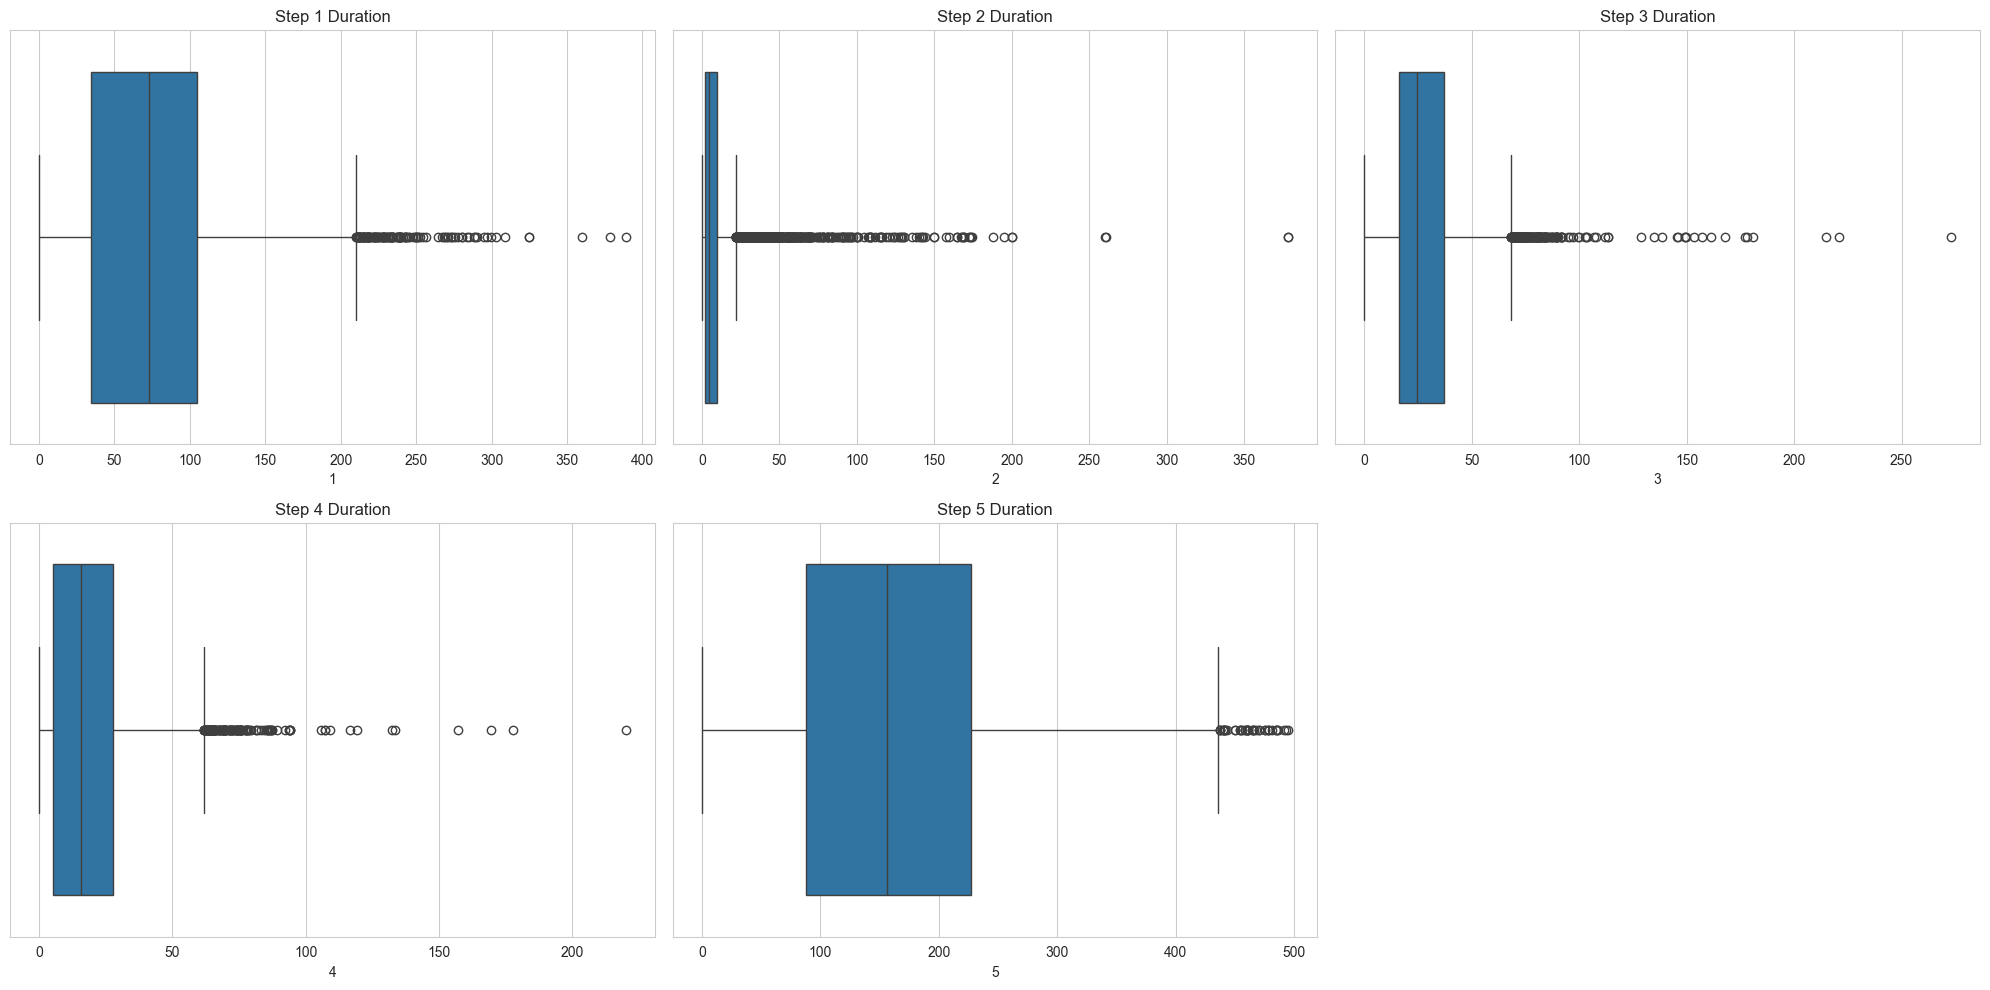

In [12]:
# 5 plots of boxplot 1-5 from df2 after removing outliers
plt.figure(figsize=(20, 10))
plt.subplot(2, 3, 1)
sns.boxplot(x=df2['1'])
plt.title('Step 1 Duration')
plt.subplot(2, 3, 2)
sns.boxplot(x=df2['2'])
plt.title('Step 2 Duration')
plt.subplot(2, 3, 3)
sns.boxplot(x=df2['3'])
plt.title('Step 3 Duration')
plt.subplot(2, 3, 4)
sns.boxplot(x=df2['4'])
plt.title('Step 4 Duration')
plt.subplot(2, 3, 5)
sns.boxplot(x=df2['5'])
plt.title('Step 5 Duration')
plt.tight_layout()
plt.show()

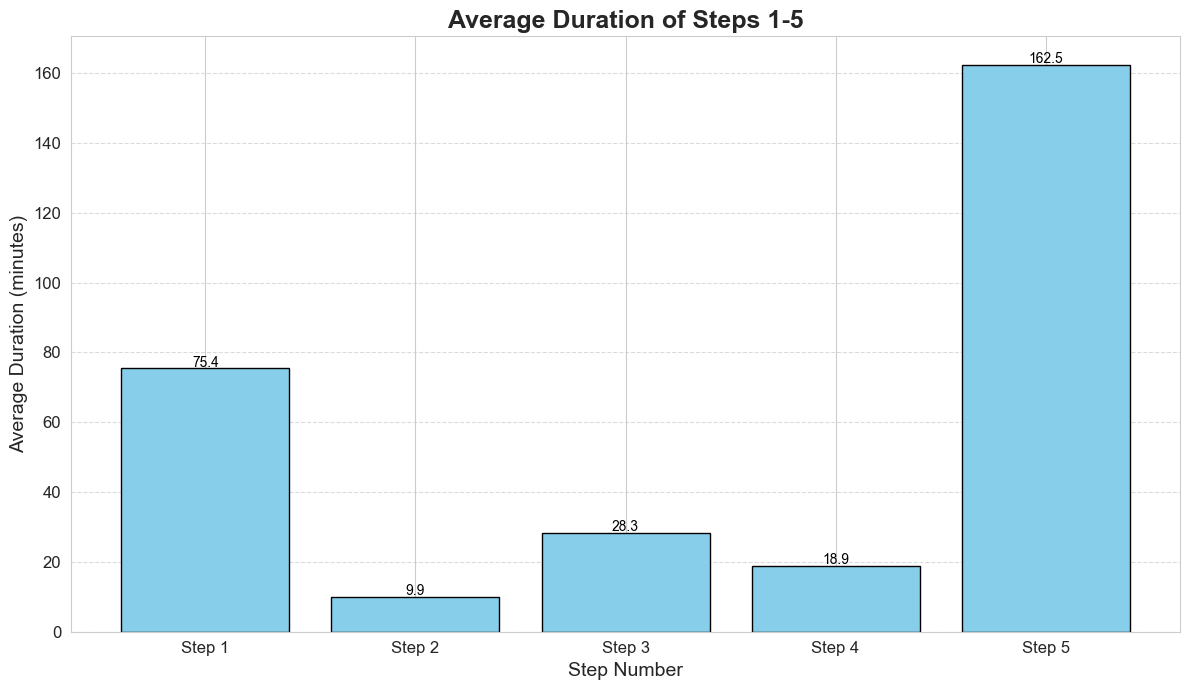

In [13]:
# Calculate average duration for each step
avg_durations = df2[['1', '2', '3', '4', '5']].mean()

# Plot the histogram
plt.figure(figsize=(12, 7))
bars = plt.bar(avg_durations.index, avg_durations.values, color='skyblue', edgecolor='black')

# Add average duration values on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f"{height:.1f}", ha='center', fontsize=10, color='black')

# Improve plot aesthetics
plt.title("Average Duration of Steps 1-5", fontsize=18, fontweight='bold')
plt.xlabel("Step Number", fontsize=14)
plt.ylabel("Average Duration (minutes)", fontsize=14)
plt.xticks(avg_durations.index, [f"Step {i}" for i in avg_durations.index], fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Total Time Statistics (all 5 steps):
Mean: 295.0 minutes
Std Dev: 102.6 minutes
Median: 296.8 minutes


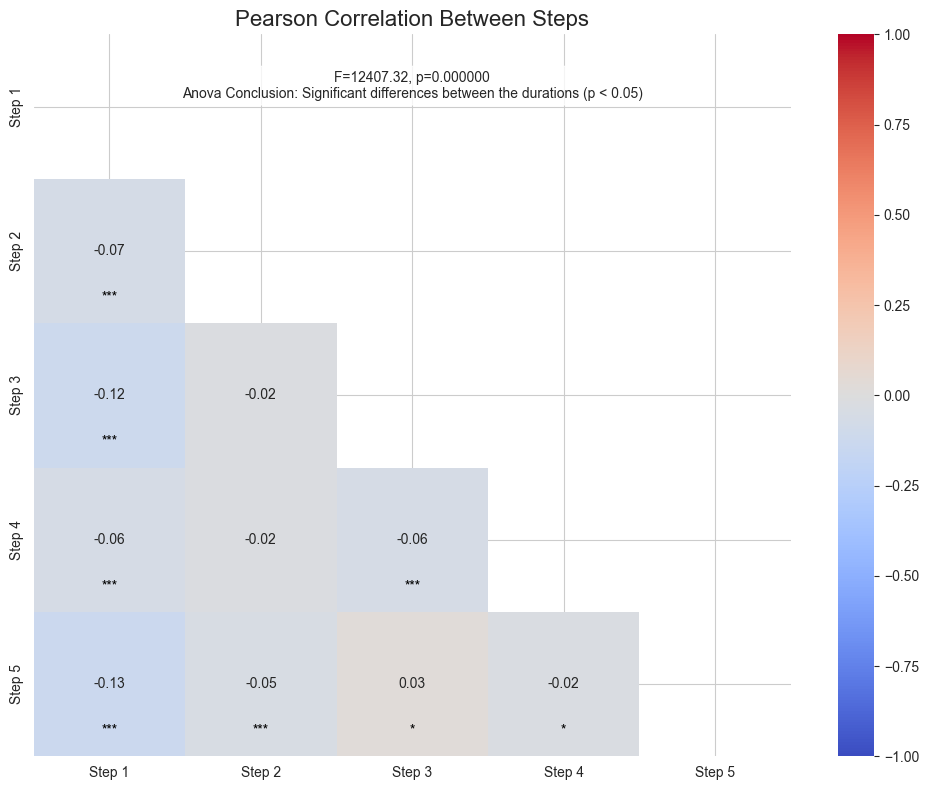

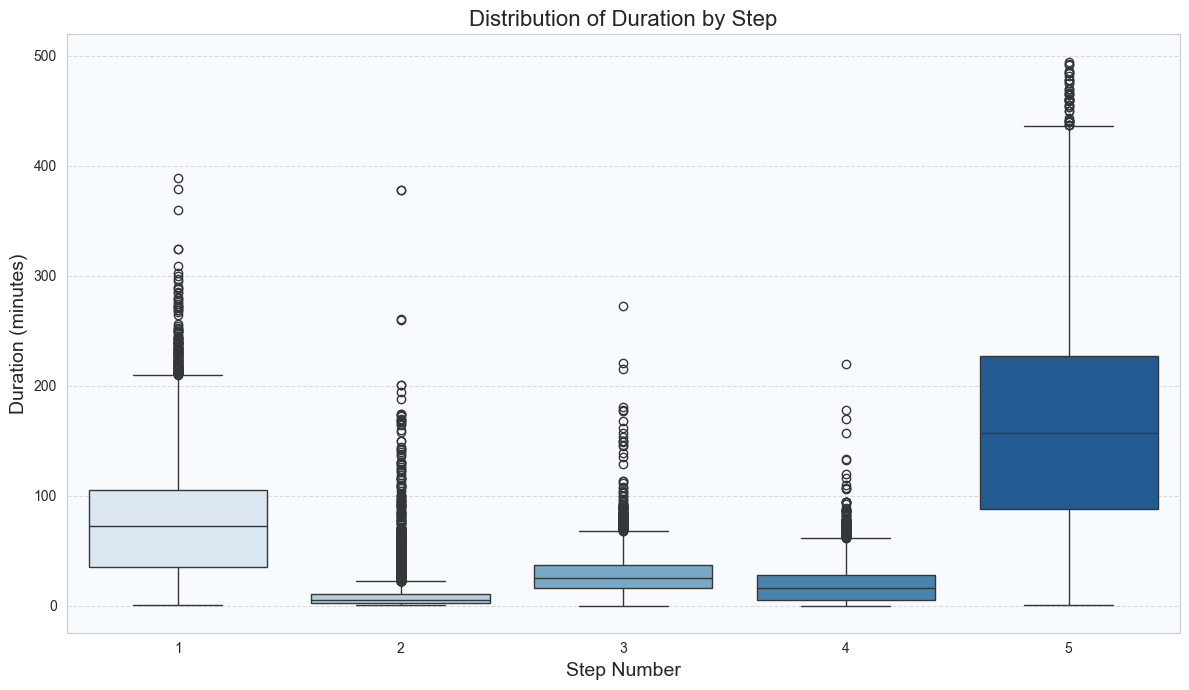

In [14]:
# Calculate total time statistics (mean, std, median for all 5 steps combined)
df2['total_time'] = df2[['1', '2', '3', '4', '5']].sum(axis=1)
total_stats = df2['total_time'].agg(['mean', 'std', 'median']).round(1)

# Display total time statistics
print(f"Total Time Statistics (all 5 steps):")
print(f"Mean: {total_stats['mean']} minutes")
print(f"Std Dev: {total_stats['std']} minutes")
print(f"Median: {total_stats['median']} minutes")

# 1) Calculate Pearson correlation between each step
from scipy.stats import pearsonr
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Create correlation matrix
step_cols = ['1', '2', '3', '4', '5']
corr_matrix = np.zeros((len(step_cols), len(step_cols)))
p_values = np.zeros((len(step_cols), len(step_cols)))

for i, col1 in enumerate(step_cols):
    for j, col2 in enumerate(step_cols):
        if i != j:  # Skip diagonal (correlation with self)
            corr, p_val = pearsonr(df2[col1], df2[col2])
            corr_matrix[i, j] = corr
            p_values[i, j] = p_val
        else:
            corr_matrix[i, j] = 1.0  # Self-correlation is 1

# Perform ANOVA to test differences between steps
import pandas as pd
from scipy import stats

# Reshape data for ANOVA (long format)
steps_data = pd.melt(df2[step_cols], var_name='Step', value_name='Duration')

# Run ANOVA
anova_result = stats.f_oneway(
    df2['1'], df2['2'], df2['3'], df2['4'], df2['5']
)

# Prepare ANOVA result text
result_text = f"F={anova_result.statistic:.2f}, p={anova_result.pvalue:.6f}\n"
if anova_result.pvalue < 0.05:
    result_text += "Anova Conclusion: Significant differences between the durations (p < 0.05)"
else:
    result_text += "Conclusion: No significant differences (p ≥ 0.05)"

# Display correlation matrix with ANOVA results
plt.figure(figsize=(10, 8))

# Mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm",
            xticklabels=[f"Step {i}" for i in step_cols],
            yticklabels=[f"Step {i}" for i in step_cols],
            mask=mask, vmin=-1, vmax=1, center=0)

# Title
plt.title("Pearson Correlation Between Steps", fontsize=16)

# Add text box with ANOVA results
props = dict(boxstyle='round', facecolor='white', alpha=0.8)
plt.text(0.5, 0.95, result_text, transform=plt.gca().transAxes, fontsize=10,
        verticalalignment='top', horizontalalignment='center', bbox=props)

# Add asterisks for significant correlations
for i in range(len(step_cols)):
    for j in range(len(step_cols)):
        if i != j and not mask[i, j]:  # Skip diagonal and upper triangle
            if p_values[i, j] < 0.001:
                plt.text(j+0.5, i+0.85, "***", ha='center', color='black', fontsize=10)
            elif p_values[i, j] < 0.01:
                plt.text(j+0.5, i+0.85, "**", ha='center', color='black', fontsize=10)
            elif p_values[i, j] < 0.05:
                plt.text(j+0.5, i+0.85, "*", ha='center', color='black', fontsize=10)

plt.tight_layout()
plt.show()
# Create boxplot to visualize differences between steps
plt.figure(figsize=(12, 7))
ax = plt.gca()
ax.set_facecolor('#f7fbff')  # Very light blue background

# Fix the FutureWarning by assigning hue properly
sns.boxplot(x='Step', y='Duration', data=steps_data, hue='Step', palette='Blues', legend=False)
plt.title("Distribution of Duration by Step", fontsize=16)
plt.xlabel("Step Number", fontsize=14)
plt.ylabel("Duration (minutes)", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

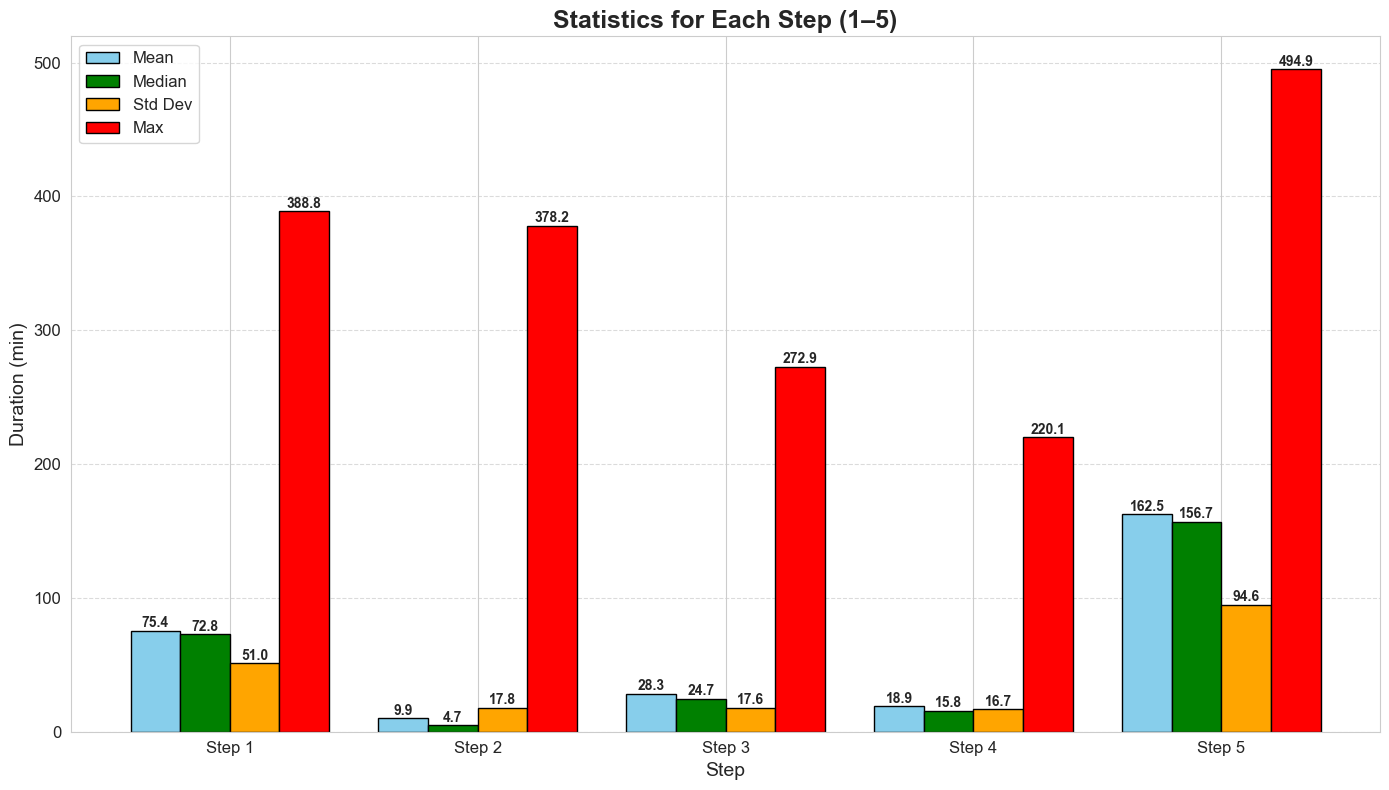

In [15]:
# Calculate statistics for each step, including the median
stats = df2[['1', '2', '3', '4', '5']].agg(['mean', 'median', 'std', 'max']).T
stats.reset_index(inplace=True)
stats.rename(columns={'index': 'Step'}, inplace=True)

# Plot the statistics
plt.figure(figsize=(14, 8))
x = range(len(stats['Step']))
width = 0.2  # Adjusted width for four bars

# Plot each statistic
bars_mean = plt.bar([i - 1.5 * width for i in x], stats['mean'], width, label='Mean', color='skyblue', edgecolor='black')
bars_median = plt.bar([i - 0.5 * width for i in x], stats['median'], width, label='Median', color='green', edgecolor='black')
bars_std = plt.bar([i + 0.5 * width for i in x], stats['std'], width, label='Std Dev', color='orange', edgecolor='black')
bars_max = plt.bar([i + 1.5 * width for i in x], stats['max'], width, label='Max', color='red', edgecolor='black')

# Add labels above bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, f"{height:.1f}",
                 ha='center', va='bottom', fontsize=10, fontweight='bold')

add_labels(bars_mean)
add_labels(bars_median)
add_labels(bars_std)
add_labels(bars_max)

# Add labels and improve aesthetics
plt.title("Statistics for Each Step (1–5)", fontsize=18, fontweight='bold')
plt.xlabel("Step", fontsize=14)
plt.ylabel("Duration (min)", fontsize=14)
plt.xticks(x, [f"Step {i}" for i in stats['Step']], fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

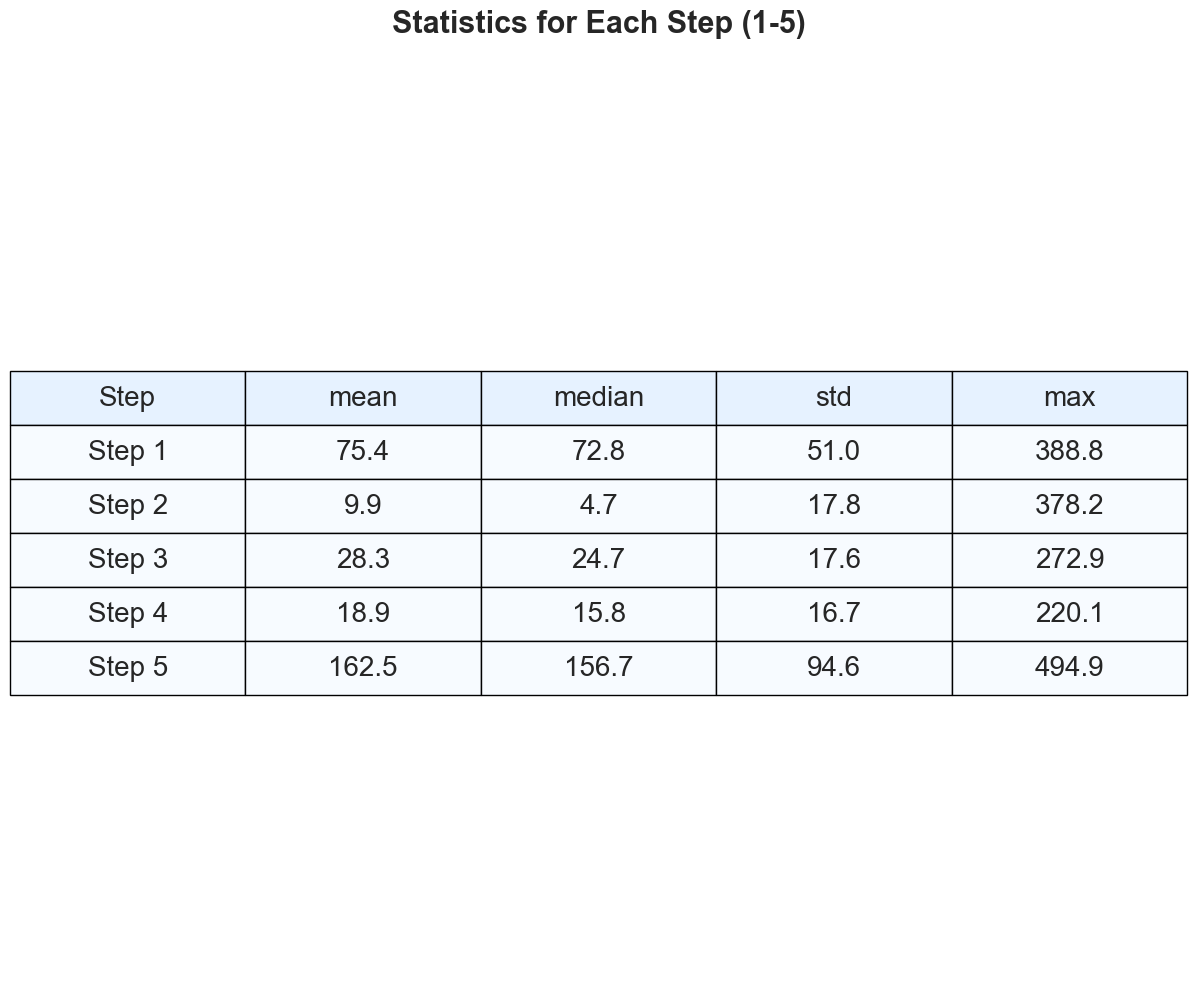

  Step  mean  median  std   max
Step 1  75.4    72.8 51.0 388.8
Step 2   9.9     4.7 17.8 378.2
Step 3  28.3    24.7 17.6 272.9
Step 4  18.9    15.8 16.7 220.1
Step 5 162.5   156.7 94.6 494.9


In [16]:
# Calculate statistics for each step
stats = df2[['1', '2', '3', '4', '5']].agg(['mean', 'median', 'std', 'max']).T
stats.reset_index(inplace=True)
stats.rename(columns={'index': 'Step'}, inplace=True)

# Format the statistics to 1 decimal place
for col in ['mean', 'median', 'std', 'max']:
    stats[col] = stats[col].round(1)

# Add "Step" prefix to the Step column
stats['Step'] = stats['Step'].apply(lambda x: f"Step {x}")

# Create a figure with substantially larger figure size
plt.figure(figsize=(18, 10))
ax = plt.subplot(111)
ax.axis('off')

# Create the table
table = ax.table(
    cellText=stats.values,
    colLabels=stats.columns,
    loc='center',
    cellLoc='center',
    colColours=['#e6f2ff']*len(stats.columns),
    cellColours=[['#f7fbff']*len(stats.columns)]*len(stats)
)

# Style the table - significantly increased scaling and font size
table.auto_set_font_size(False)
table.set_fontsize(20)  # Even larger font
table.scale(1.8, 2.8)   # Increased scaling substantially

# Add more padding inside cells
for cell in table._cells:
    table._cells[cell].PAD = 0.08  # Increase padding further

plt.title("Statistics for Each Step (1-5)", fontsize=22, fontweight='bold', pad=40)
plt.tight_layout()
plt.show()

# Also print the table as text for clarity
print(stats.to_string(index=False))

Week Analysis


In [17]:
df2.head()

,pharmacy_id,visit_id,visit_DT,medication_pharmacy_name,time_from_visit_to_nurse,from_nurse_to_pharmacy,from_pharmacy_till_mstart_making,from_making_till_printing,from_printing_till_giving,1,2,3,4,5,visit_date,visit_hour,visit_hour_formatted,total_time
4,412009,14459265,2022-01-20 09:26:22.677,Fluorouracil 5000 mg,2022-01-20 10:45:12.700,2022-01-20 11:20:02.170,2022-01-20 11:50:19.233,2022-01-20 11:55:33.770,2022-01-20 12:20:00.000,78.833717,34.824500,30.284383,5.242283,24.437167,2022-01-20,9,09:00,173.622050
12,8917,14434802,2022-01-21 08:17:19.803,Zolbetuximab 105mg Inj,2022-01-21 10:27:00.903,2022-01-21 10:36:06.000,2022-01-21 11:13:26.530,2022-01-21 11:47:53.870,2022-01-21 12:05:00.000,129.685000,9.084950,37.342167,34.455667,17.102167,2022-01-21,8,08:00,227.669950
17,52215,14450852,2022-01-22 08:01:53.900,Erbitux 100mg Inj,2022-01-22 08:59:10.110,2022-01-22 09:43:08.587,2022-01-22 10:06:13.840,2022-01-22 10:14:05.423,2022-01-22 11:00:00.000,57.270167,43.974617,23.087550,7.859717,45.909617,2022-01-22,8,08:00,178.101667
20,2512062,14434757,2022-01-22 08:10:59.423,Keytruda 100 mg Inj,2022-01-22 08:51:29.020,2022-01-22 08:53:34.410,2022-01-22 09:08:46.977,2022-01-22 09:09:24.100,2022-01-22 10:00:00.000,40.493283,2.089833,15.209450,0.618717,50.598333,2022-01-22,8,08:00,109.009617
31,237719,14434653,2022-01-23 08:00:29.553,Ogivri 420 mg Inj,2022-01-23 08:28:13.503,2022-01-23 08:34:20.183,2022-01-23 09:08:54.053,2022-01-23 09:09:24.100,2022-01-23 11:16:48.937,27.732500,6.111333,34.564500,0.500783,127.413950,2022-01-23,8,08:00,196.323067


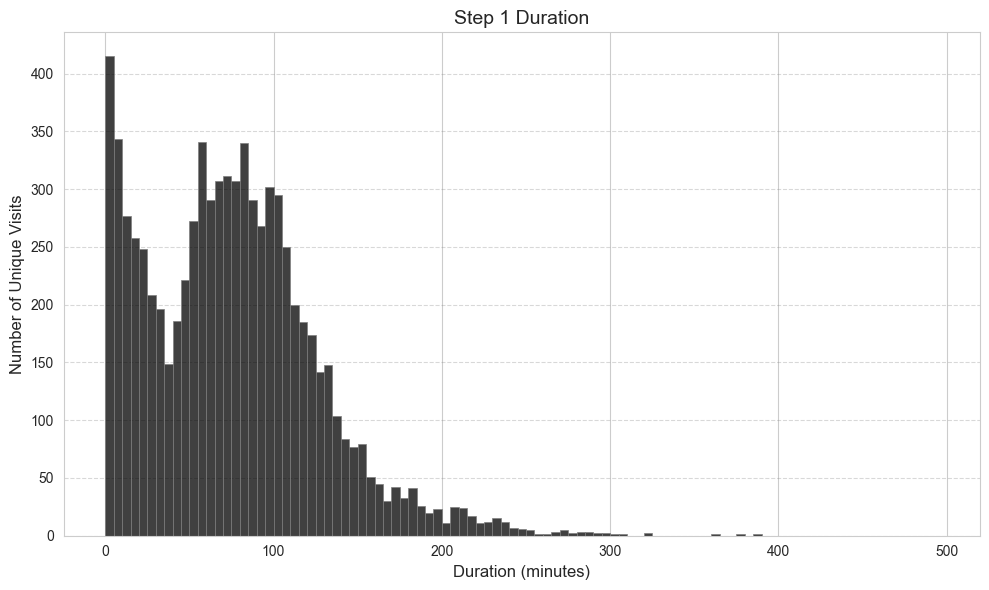

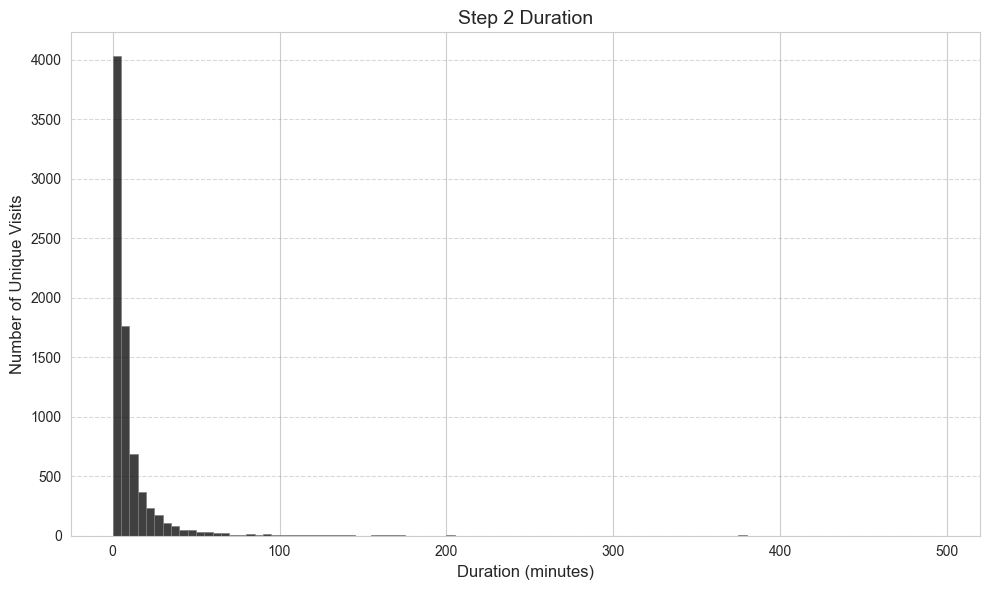

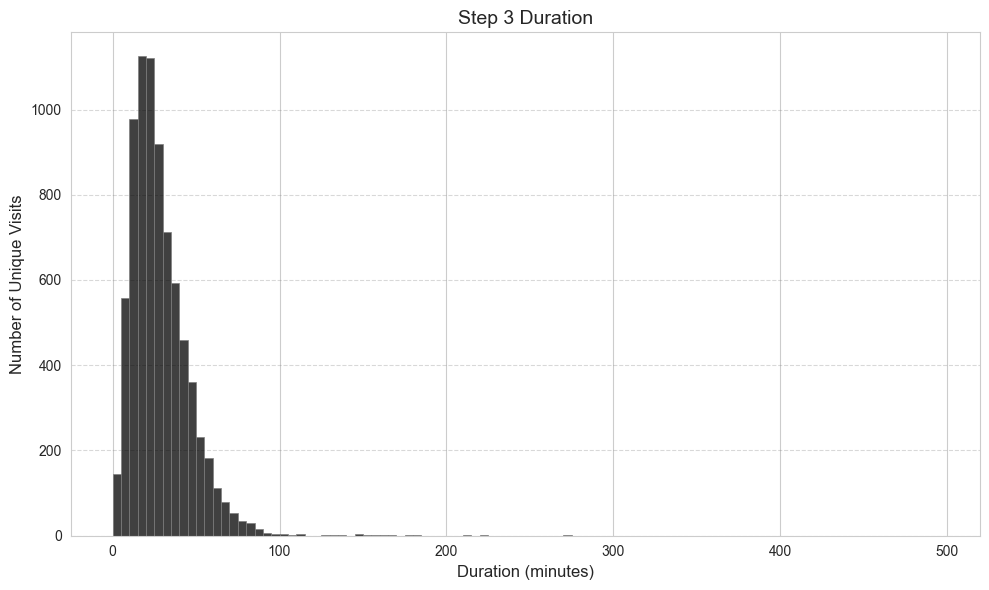

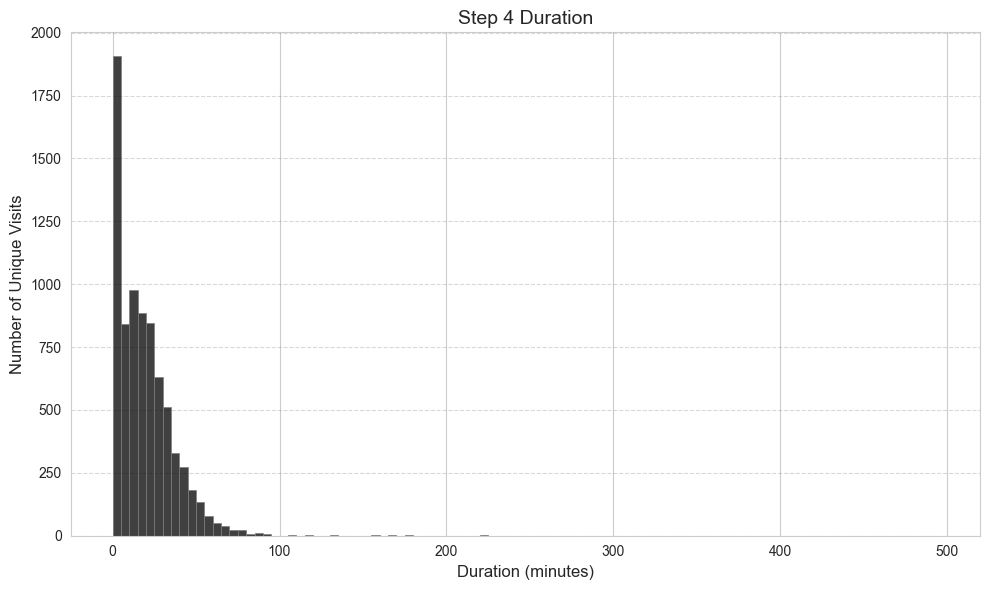

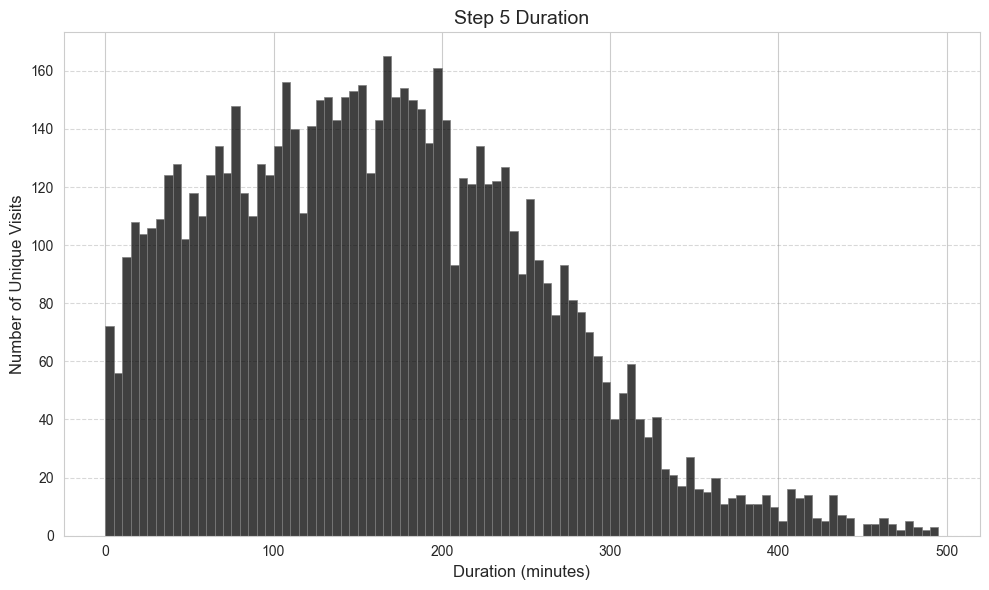

In [18]:
# Define the bin edges for the intervals (0-5, 5-10, etc.)
bins = np.arange(0, df2[['1', '2', '3', '4', '5']].max().max() + 5, 5)

# Create histograms for each step in separate figures
for step in ['1', '2', '3', '4', '5']:
    plt.figure(figsize=(10, 6), facecolor='white')

    # Set the axes background to white
    ax = plt.gca()
    ax.set_facecolor('white')

    # Create histogram with black bars
    sns.histplot(df2[step], bins=bins, kde=False, color='black', edgecolor='gray')

    plt.title(f"Step {step} Duration", fontsize=14)
    plt.xlabel("Duration (minutes)", fontsize=12)
    plt.ylabel("Number of Unique Visits", fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.3, color='gray')

    plt.tight_layout()
    plt.show()

Medicine Analysis


In [19]:
# new column of medicine name - until the first digit
df['medication_name'] = df['medication_pharmacy_name'].str.extract(r'([^\d]+)')[0]
df2['medication_name'] = df2['medication_pharmacy_name'].str.extract(r'([^\d]+)')[0]


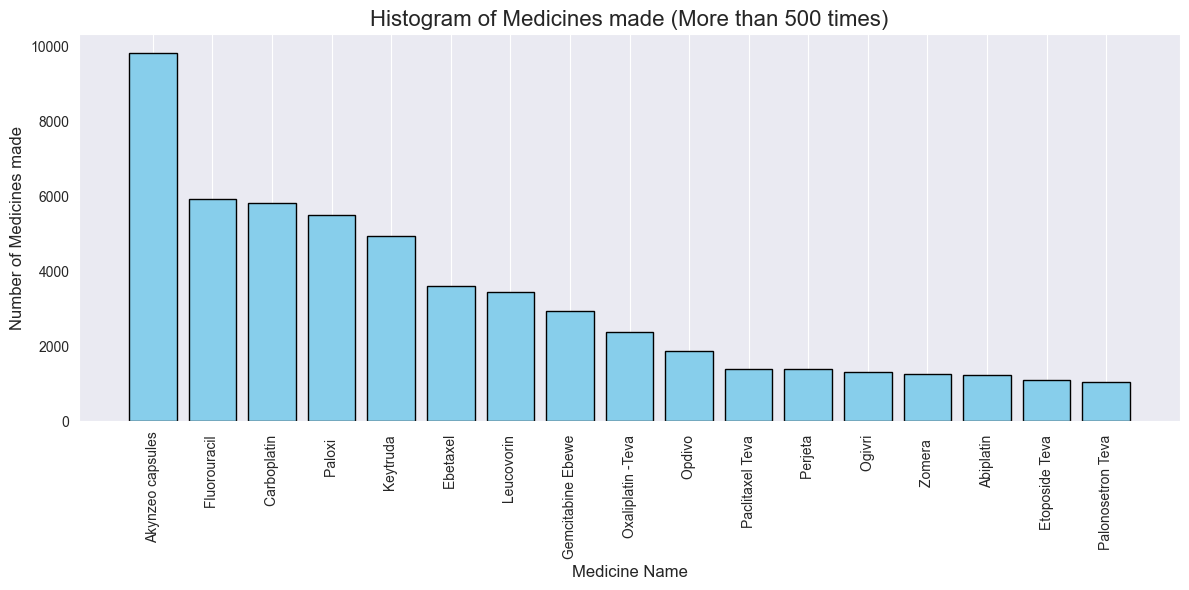

In [20]:
# histogram of number of medicines used more than 500
medicines = df['medication_name'].value_counts()
medicines = medicines[medicines > 1000]
plt.figure(figsize=(12, 6))
plt.bar(medicines.index, medicines.values, color='skyblue', edgecolor='black')
plt.title("Histogram of Medicines made (More than 500 times)", fontsize=16)
plt.xlabel("Medicine Name", fontsize=12)
plt.ylabel("Number of Medicines made", fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()



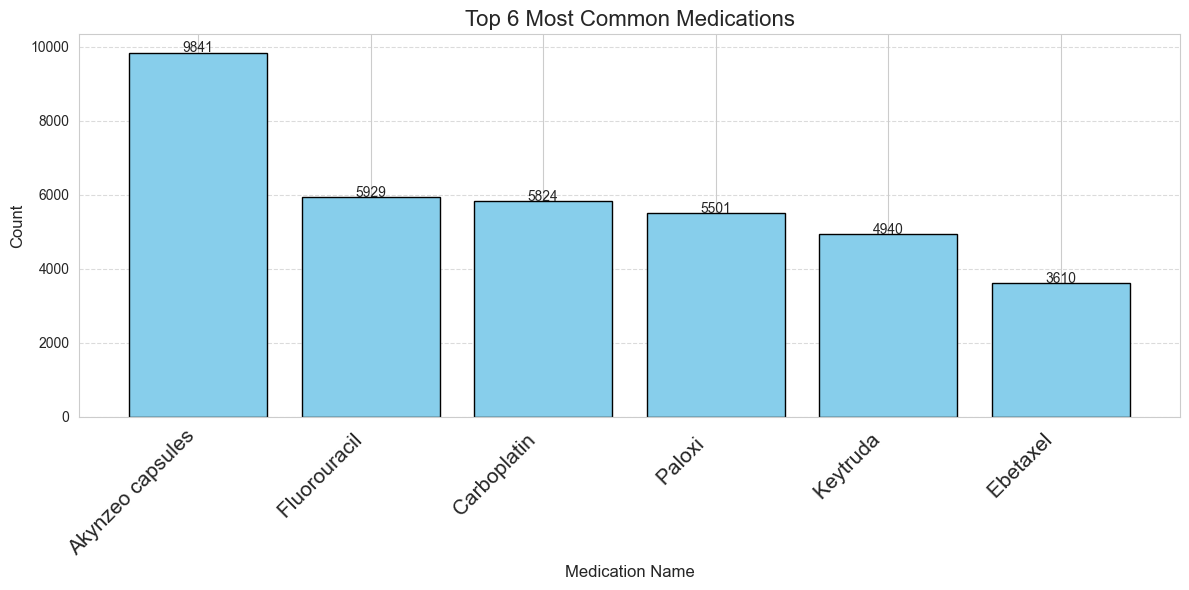

In [32]:
# Extract the top 6 medications globally (without filtering)
medicines = df['medication_name'].value_counts()  # Get the full list
top_6_meds = medicines.head(6).index  # Top 6 medication names
top_6_values = medicines.head(6).values  # Top 6 medication counts

# Plot the bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(top_6_meds, top_6_values, color='skyblue', edgecolor='black')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 5,
             f'{int(height)}', ha='center', fontsize=10)

plt.title("Top 6 Most Common Medications", fontsize=16)
plt.xlabel("Medication Name", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

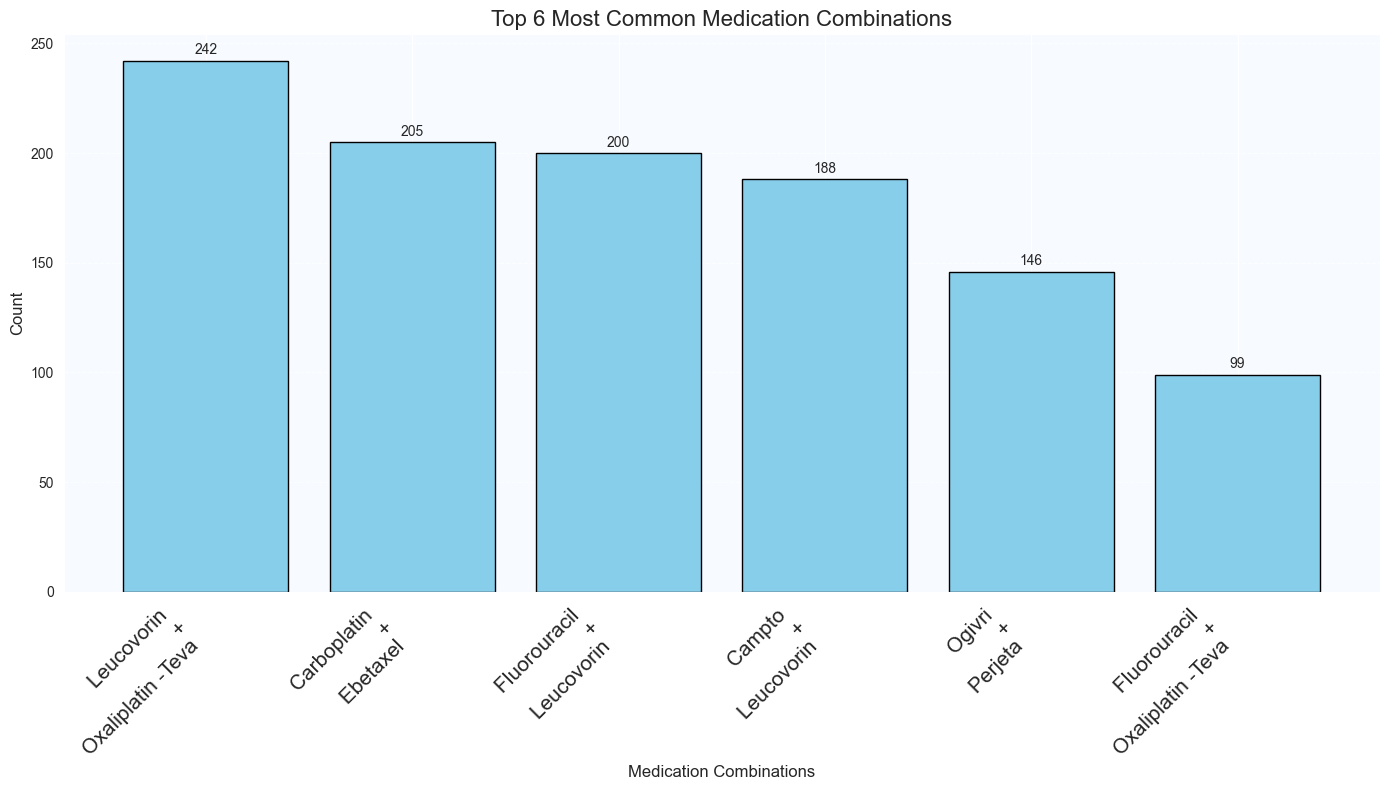

In [22]:
# Create a DataFrame for medication combinations
from itertools import combinations
from collections import Counter

# Group by visit_id to get medications prescribed in the same visit
visit_meds = df2.groupby('visit_id')['medication_name'].apply(list)

# Generate all pairs of medications for each visit
med_pairs = []
for meds in visit_meds:
    # Only consider unique medications in each visit
    unique_meds = list(set(meds))
    if len(unique_meds) >= 2:  # Only include visits with at least 2 different medications
        med_pairs.extend(combinations(sorted(unique_meds), 2))

# Count frequency of each pair
pair_counts = Counter(med_pairs)

# Get the top 6 most common pairs
top_pairs = pd.DataFrame(pair_counts.most_common(6), columns=['Medication Pair', 'Count'])

# Extract medication pairs and counts for plotting
med_pairs_labels = [f"{pair[0]}\n+\n{pair[1]}" for pair in top_pairs['Medication Pair']]
pair_counts_values = top_pairs['Count']

# Create the bar chart
plt.figure(figsize=(14, 8))
bars = plt.bar(med_pairs_labels, pair_counts_values, color='skyblue', edgecolor='black')

# Add count labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 3,
             f'{int(height)}', ha='center', fontsize=10)

# Add title and labels
plt.title("Top 6 Most Common Medication Combinations", fontsize=16)
plt.xlabel("Medication Combinations", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Set background color for the plot area to a much lighter color
ax = plt.gca()
ax.set_facecolor('#f7fbff')  # Very light blue background

plt.tight_layout()
plt.show()

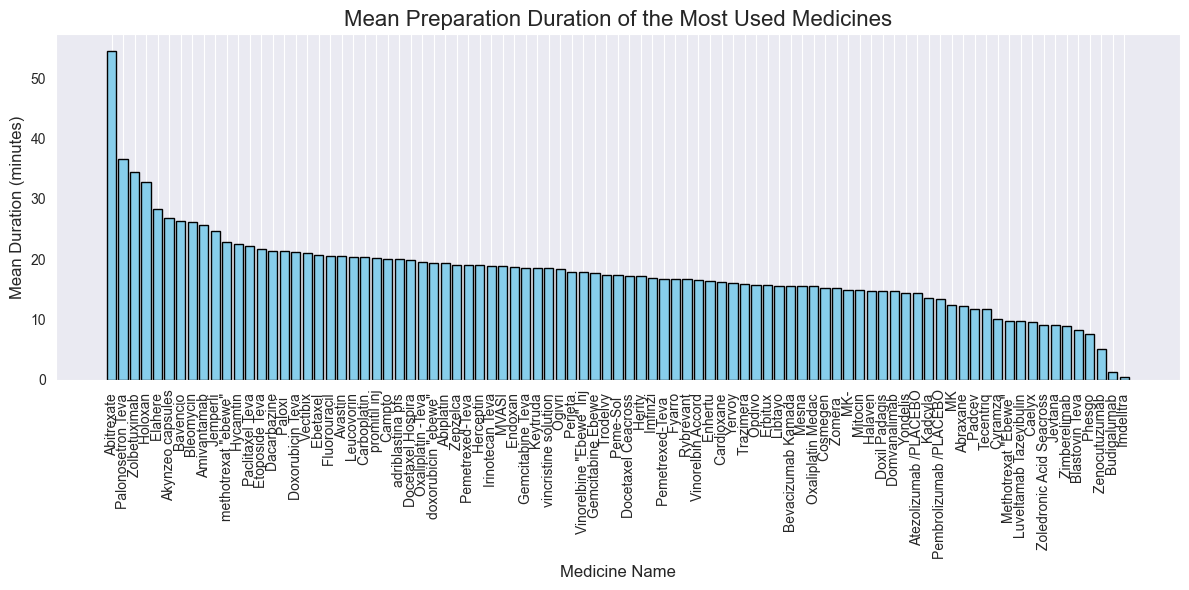

In [23]:
# Filter df2 for medicines in the medicines list
df_filtered = df2[df2['medication_name'].isin(medicines.index)]

# Calculate mean duration for step 4 for each medicine
mean_durations = df_filtered.groupby('medication_name')['4'].mean().sort_values(ascending=False)

# Plot the histogram
plt.figure(figsize=(12, 6))
plt.bar(mean_durations.index, mean_durations.values, color='skyblue', edgecolor='black')
plt.title("Mean Preparation Duration of the Most Used Medicines", fontsize=16)
plt.xlabel("Medicine Name", fontsize=12)
plt.ylabel("Mean Duration (minutes)", fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

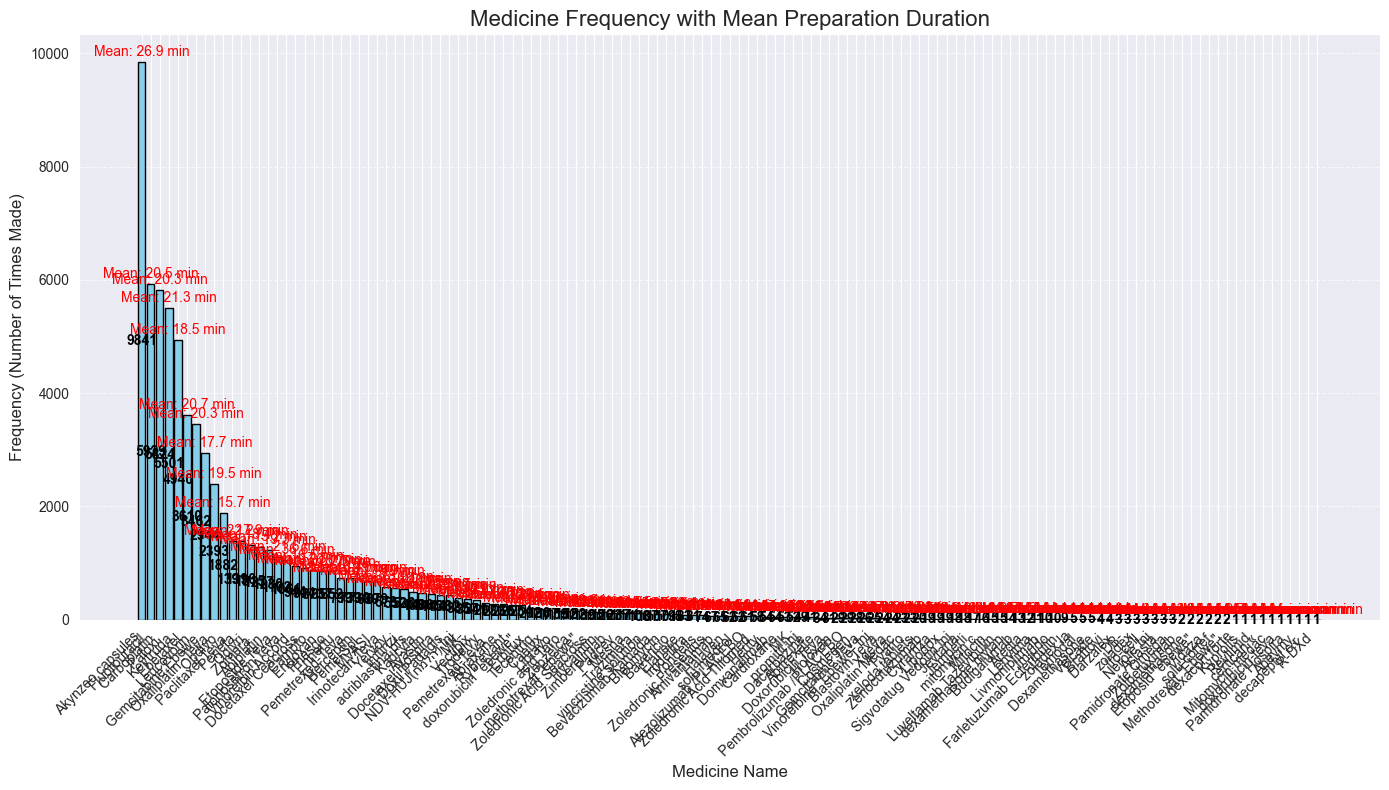

In [24]:

# Calculate statistics for preparation duration (Step 4) for each medicine
med_stats = df2[df2['medication_name'].isin(medicines.index)].groupby('medication_name')['4'].agg(
    ['mean', 'median', 'std']
).round(2)

# Merge frequency and duration stats
med_analysis = pd.DataFrame({
    'frequency': medicines,
}).join(med_stats)

# Sort by frequency (highest first)
med_analysis = med_analysis.sort_values('frequency', ascending=False)

# Option 1: Bar Chart of Frequency with Mean Duration Annotations
plt.figure(figsize=(14, 8))
bars = plt.bar(med_analysis.index, med_analysis['frequency'], color='skyblue', edgecolor='black')

# Add frequency labels inside each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height/2,
             f'{int(height)}', ha='center', va='center', fontsize=10, color='black', fontweight='bold')

# Add mean duration annotations on top of each bar
for i, (idx, row) in enumerate(med_analysis.iterrows()):
    plt.text(i, row['frequency'] + 50, f"Mean: {row['mean']:.1f} min",
             ha='center', va='bottom', fontsize=10, color='red')

plt.title("Medicine Frequency with Mean Preparation Duration", fontsize=16)
plt.xlabel("Medicine Name", fontsize=12)
plt.ylabel("Frequency (Number of Times Made)", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



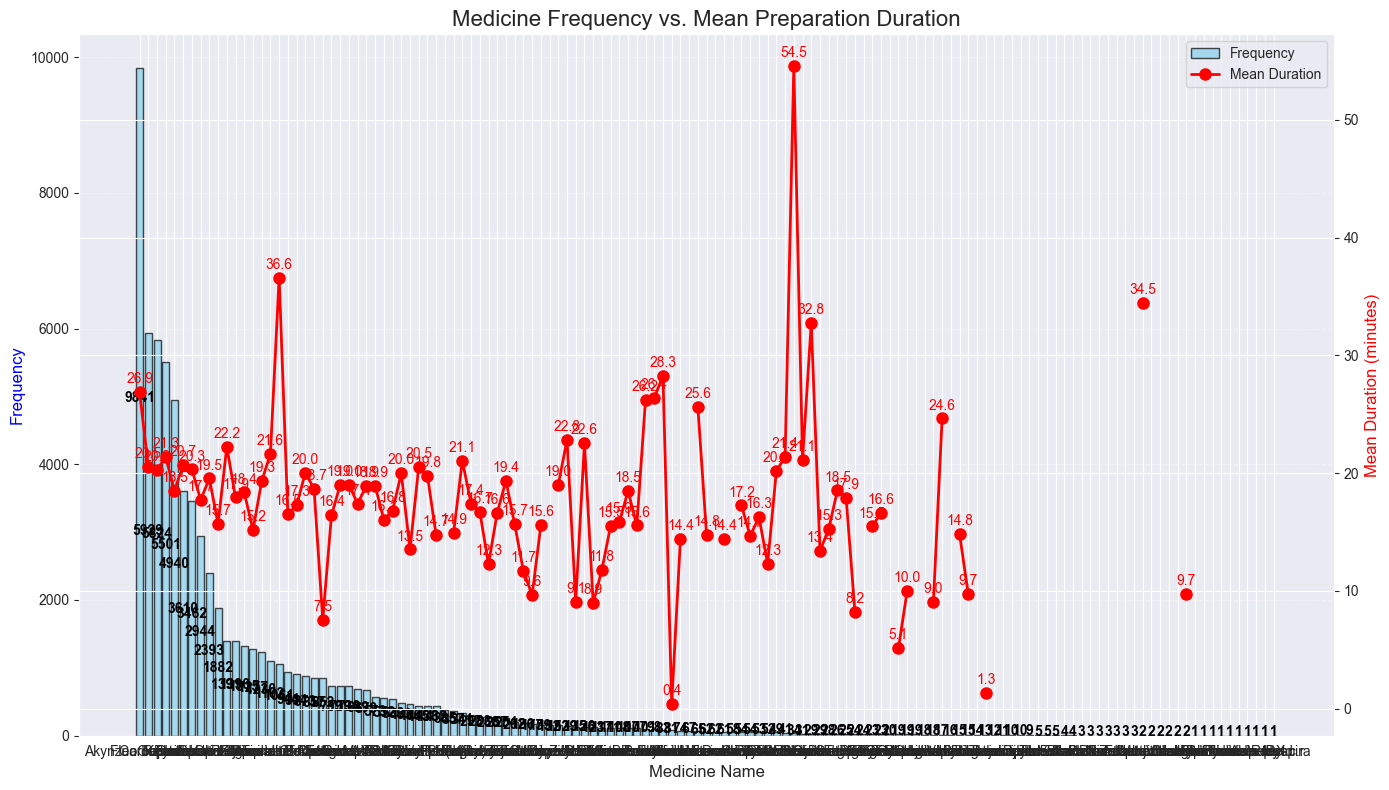

In [25]:
# Option 2: Dual-Axis Bar Chart
fig, ax1 = plt.figure(figsize=(14, 8)), plt.gca()

# Plot frequency bars on first axis
bars = ax1.bar(med_analysis.index, med_analysis['frequency'], color='skyblue',
               alpha=0.7, edgecolor='black', label='Frequency')

# Add frequency labels on the bars
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, height/2,
             f'{int(height)}', ha='center', color='black', fontweight='bold')

# Create second axis for duration
ax2 = ax1.twinx()
line = ax2.plot(med_analysis.index, med_analysis['mean'], 'ro-', linewidth=2,
                markersize=8, label='Mean Duration')

# Add duration labels
for i, val in enumerate(med_analysis['mean']):
    ax2.text(i, val + 0.5, f"{val:.1f}", ha='center', va='bottom', color='red')

# Set labels and title
ax1.set_xlabel('Medicine Name', fontsize=12)
ax1.set_ylabel('Frequency', color='blue', fontsize=12)
ax2.set_ylabel('Mean Duration (minutes)', color='red', fontsize=12)
plt.title('Medicine Frequency vs. Mean Preparation Duration', fontsize=16)

# Add combined legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper right')

plt.xticks(rotation=45, ha='right')
ax1.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()



C:\Users\dani9\AppData\Local\Temp\ipykernel_35088\1655211336.py:62: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


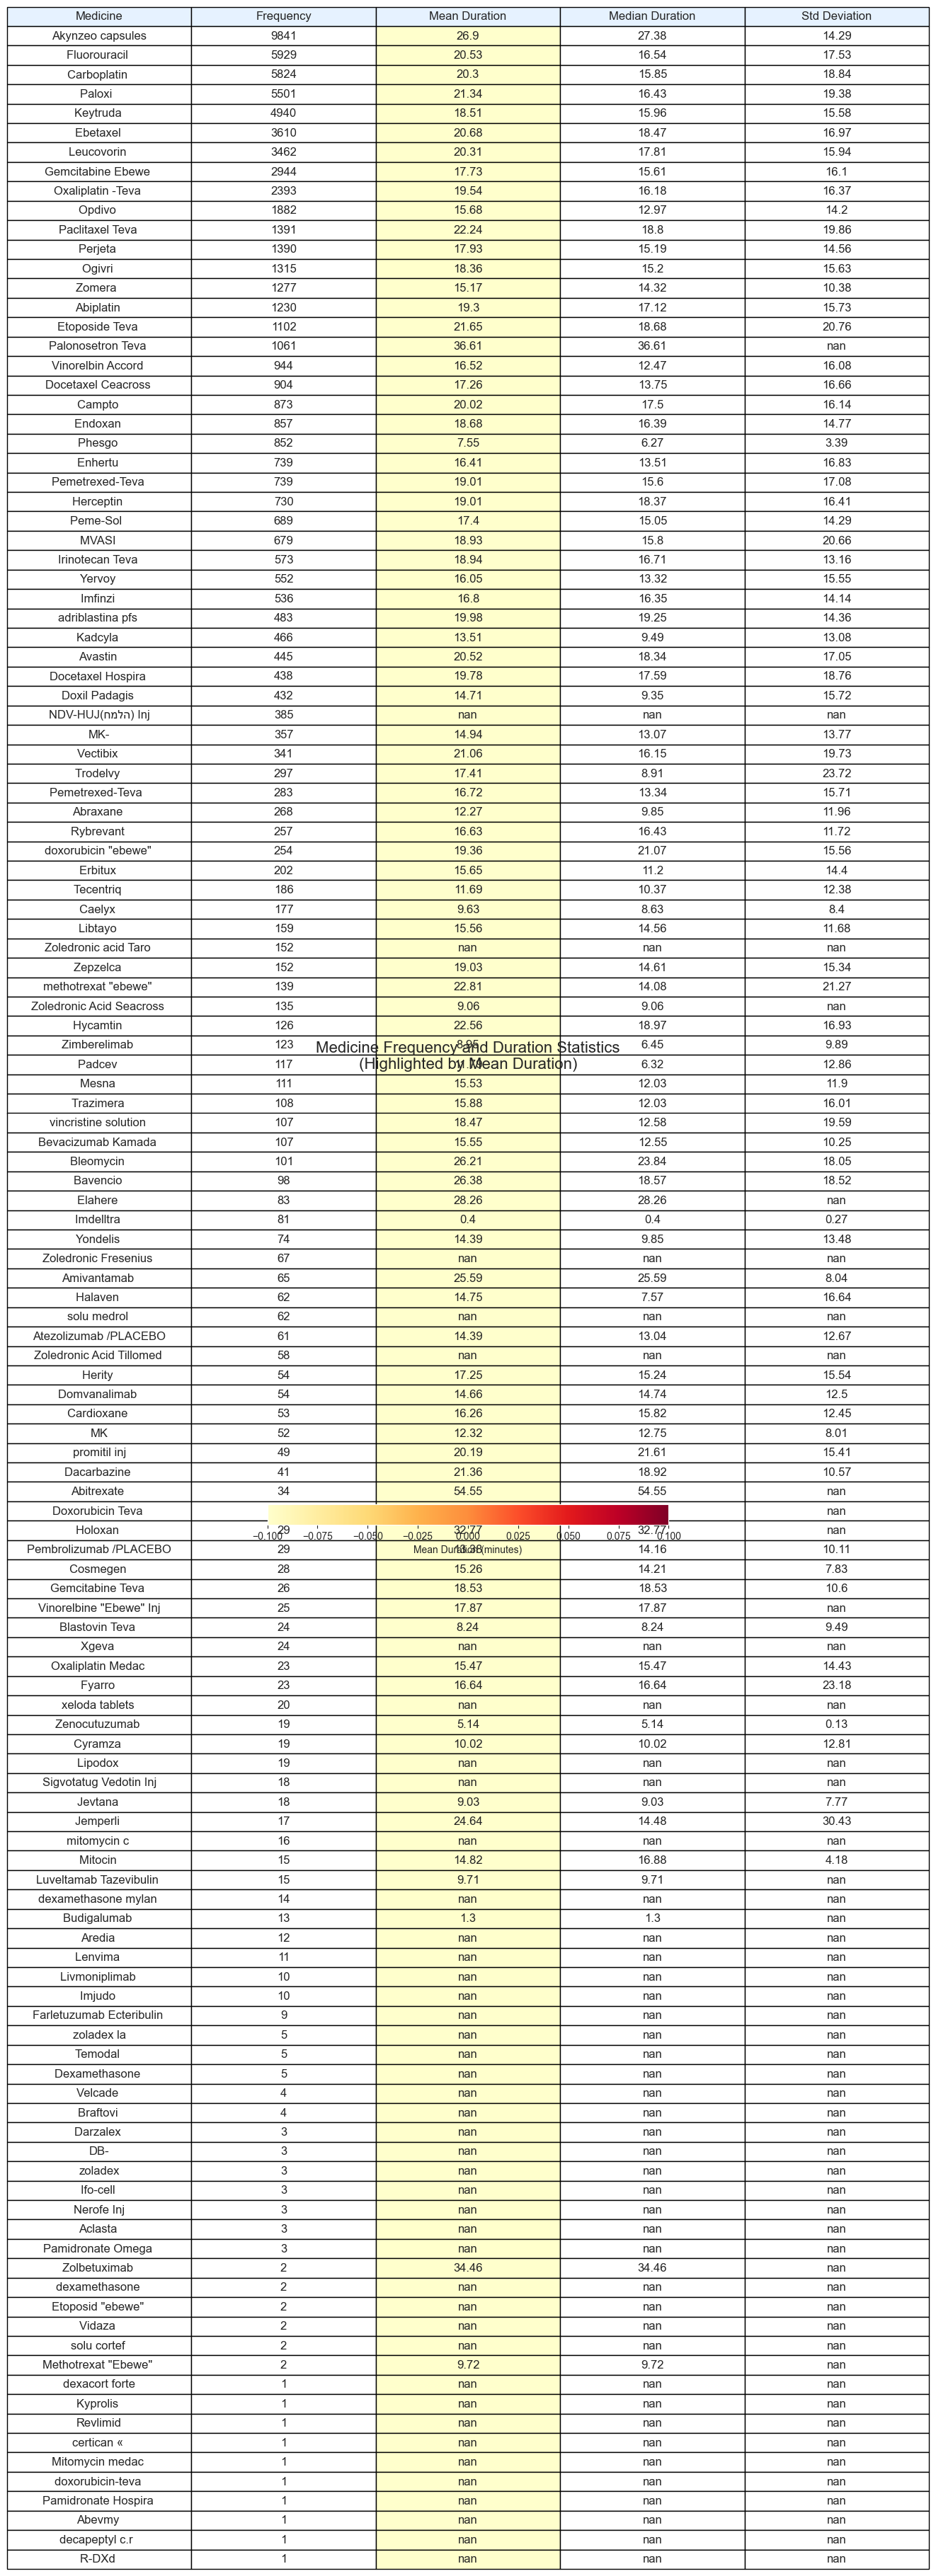

In [26]:
# Option 4: Combined Table View with conditional coloring for mean duration
# Format the table for display
table_data = med_analysis.copy()
table_data = table_data.reset_index()
table_data.columns = ['Medicine', 'Frequency', 'Mean Duration', 'Median Duration', 'Std Deviation']

# Create a figure with a larger figure size
plt.figure(figsize=(14, 8))
ax = plt.subplot(111)
ax.axis('off')

# Define color mapping for mean duration column (index 2)
mean_durations = table_data['Mean Duration'].values
min_duration = mean_durations.min()
max_duration = mean_durations.max()

# Create the table with all medicine data
table = ax.table(
    cellText=table_data.values,
    colLabels=table_data.columns,
    loc='center',
    cellLoc='center',
    colColours=['#e6f2ff']*len(table_data.columns),
)

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.8)

# Add more padding inside cells
for cell in table._cells:
    table._cells[cell].PAD = 0.05

    # Color the cells in the Mean Duration column based on their values
    if cell[0] > 0 and cell[1] == 2:  # Mean Duration column (index 2)
        row_idx = cell[0] - 1  # Adjust for header row
        duration = mean_durations[row_idx]
        # Calculate normalized value (0-1)
        normalized = (duration - min_duration) / (max_duration - min_duration) if max_duration > min_duration else 0
        # Create color from light yellow to deep red
        color = plt.cm.YlOrRd(normalized)
        table._cells[cell].set_facecolor(color)

        # Use black text for light backgrounds, white text for dark backgrounds
        if normalized > 0.7:
            table._cells[cell].get_text().set_color('white')

        # Make the font bold for high values
        if normalized > 0.5:
            table._cells[cell]._text.set_fontweight('bold')

# Add a title and colorbar-like legend
plt.title("Medicine Frequency and Duration Statistics\n(Highlighted by Mean Duration)", fontsize=16, pad=20)

# Add a legend explaining the color gradient
sm = plt.cm.ScalarMappable(cmap=plt.cm.YlOrRd, norm=plt.Normalize(min_duration, max_duration))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='horizontal', fraction=0.046, pad=0.04)
cbar.set_label('Mean Duration (minutes)')

plt.tight_layout()
plt.show()

C:\Users\dani9\AppData\Local\Temp\ipykernel_35088\3409915601.py:32: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


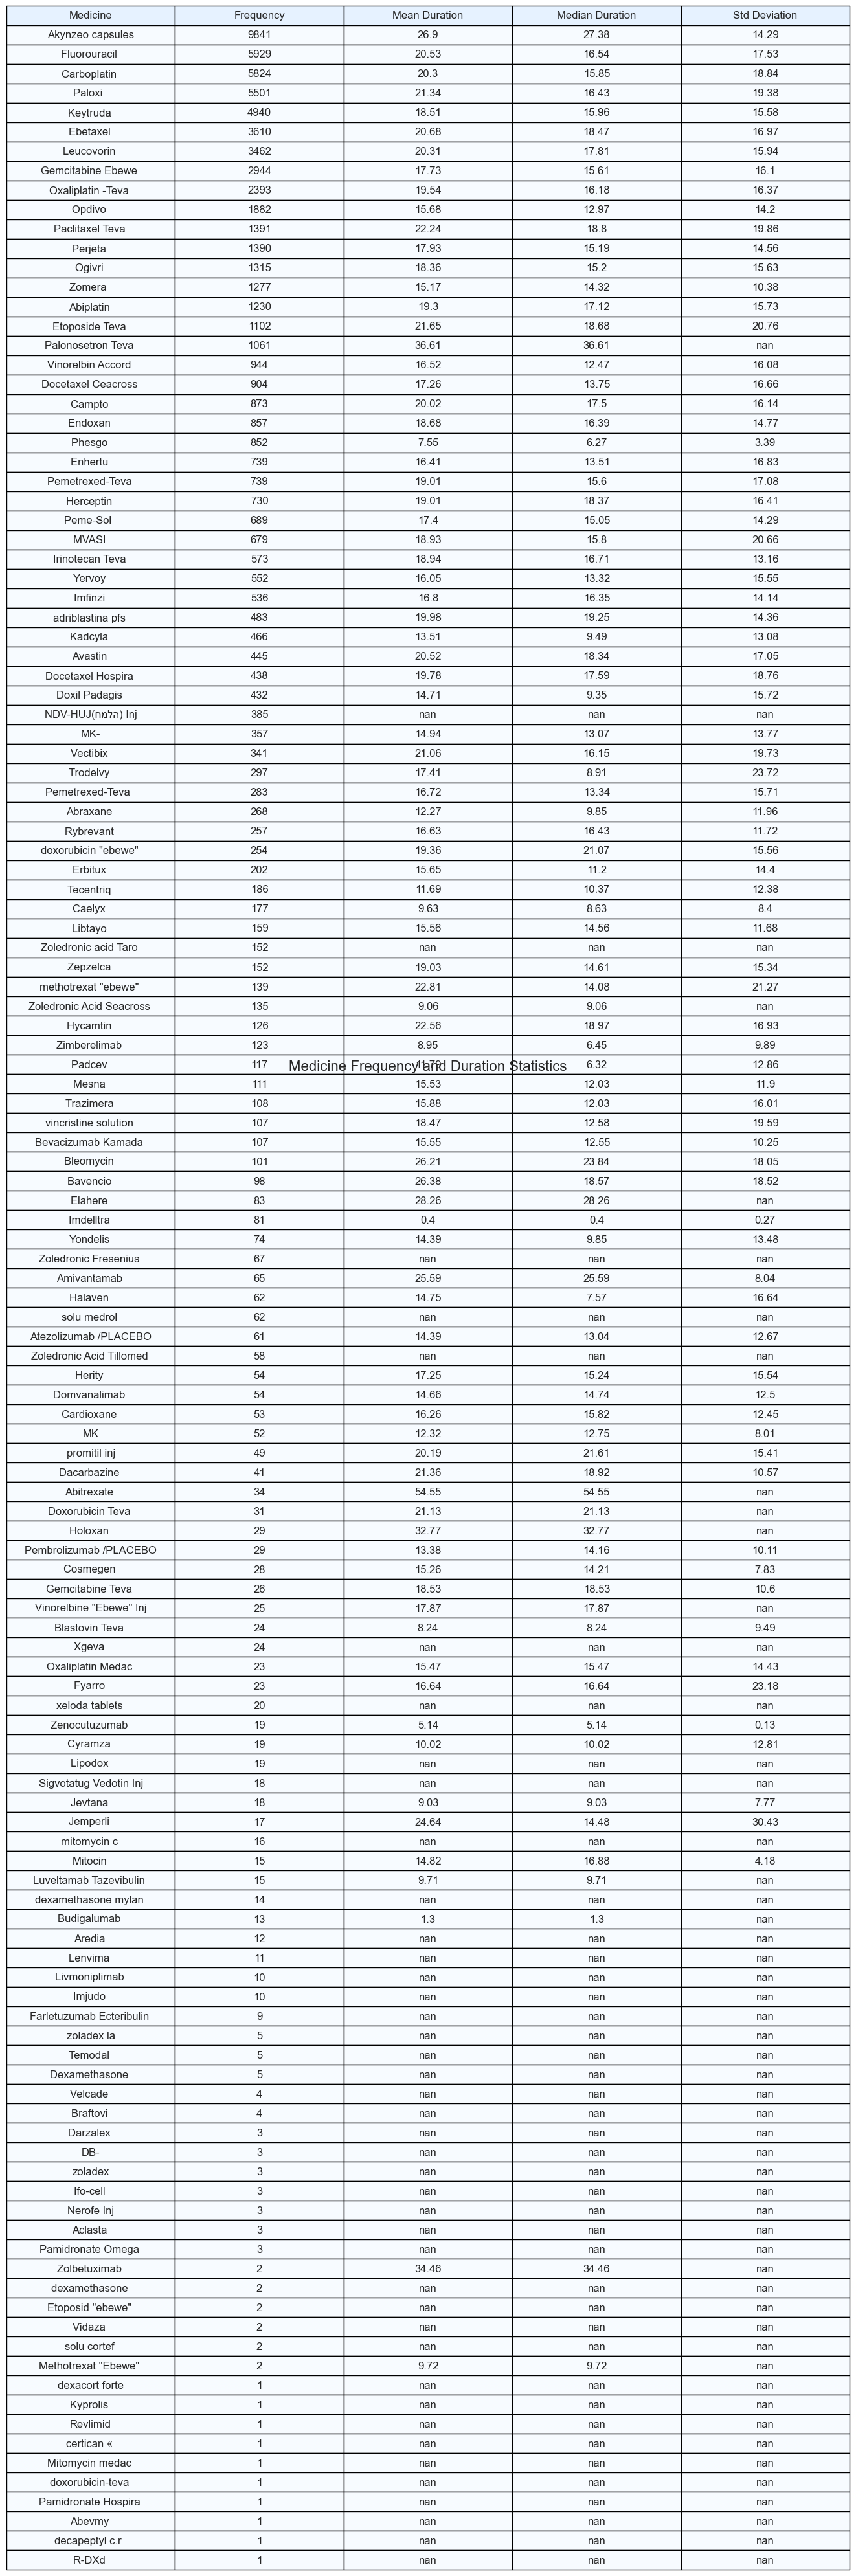

In [27]:
# Option 4: Combined Table View
# Format the table for display
table_data = med_analysis.copy()
table_data = table_data.reset_index()
table_data.columns = ['Medicine', 'Frequency', 'Mean Duration', 'Median Duration', 'Std Deviation']

# Create a figure with a larger figure size
plt.figure(figsize=(14, 8))
ax = plt.subplot(111)
ax.axis('off')

# Create the table with all medicine data
table = ax.table(
    cellText=table_data.values,
    colLabels=table_data.columns,
    loc='center',
    cellLoc='center',
    colColours=['#e6f2ff']*len(table_data.columns),
    cellColours=[['#f7fbff']*len(table_data.columns)]*len(table_data)
)

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.8)

# Add more padding inside cells
for cell in table._cells:
    table._cells[cell].PAD = 0.05

plt.title("Medicine Frequency and Duration Statistics", fontsize=16, pad=20)
plt.tight_layout()
plt.show()

In [28]:
df2.describe()

,pharmacy_id,visit_id,visit_DT,time_from_visit_to_nurse,from_nurse_to_pharmacy,from_pharmacy_till_mstart_making,from_making_till_printing,from_printing_till_giving,1,2,3,4,5,visit_hour,total_time
count,7.754000e+03,7.754000e+03,7754,7754,7754,7754,7754,7754,7754.000000,7754.000000,7754.000000,7754.000000,7754.000000,7754.000000,7754.000000
mean,1.204374e+06,1.553848e+07,2023-03-12 09:56:30.012974080,2023-03-12 11:11:55.975250176,2023-03-12 11:21:49.360684288,2023-03-12 11:50:08.279745024,2023-03-12 12:09:01.974854656,2023-03-12 14:51:29.586946816,75.432705,9.889757,28.315318,18.894918,162.460202,8.537400,294.992900
min,1.083000e+03,1.443126e+07,2022-01-20 09:26:22.677000,2022-01-20 10:45:12.700000,2022-01-20 11:20:02.170000,2022-01-20 11:50:19.233000,2022-01-20 11:55:33.770000,2022-01-20 12:20:00,0.210717,0.095883,0.028500,0.007000,0.078167,7.000000,34.119667
25%,3.529570e+05,1.470329e+07,2022-05-10 08:42:58.707000064,2022-05-10 10:41:05.692999936,2022-05-10 10:59:44.629750016,2022-05-10 11:46:21.640750080,2022-05-10 11:59:34.624999936,2022-05-10 14:00:00,34.686712,2.192208,16.237596,5.196688,87.555250,8.000000,222.072358
50%,7.580310e+05,1.525824e+07,2022-12-14 08:43:45.640000,2022-12-14 10:29:06.487000064,2022-12-14 10:38:02.795000064,2022-12-14 10:54:51.379999744,2022-12-14 11:38:54.192999936,2022-12-14 15:13:27.236499968,72.770783,4.717783,24.680525,15.794325,156.676808,8.000000,296.818392
75%,2.431144e+06,1.620264e+07,2023-11-18 02:13:32.564499968,2023-11-18 03:56:19.097750016,2023-11-18 03:59:31.829000192,2023-11-18 04:26:25.741500160,2023-11-18 04:41:15.769999872,2023-11-18 08:40:22.420249856,104.838050,10.098600,36.986404,27.778663,227.006879,9.000000,365.213858
max,2.875258e+06,1.787392e+07,2025-06-24 08:44:38.050000,2025-06-24 09:09:13.273000,2025-06-24 09:13:25.363000,2025-06-24 09:54:27.623000,2025-06-24 09:56:07.703000,2025-06-24 16:04:18.973000,388.807617,378.202000,272.872600,220.060000,494.880167,16.000000,691.056450
std,9.716063e+05,9.595942e+05,NaN,NaN,NaN,NaN,NaN,NaN,50.955675,17.763079,17.563070,16.661824,94.608957,1.151699,102.648273


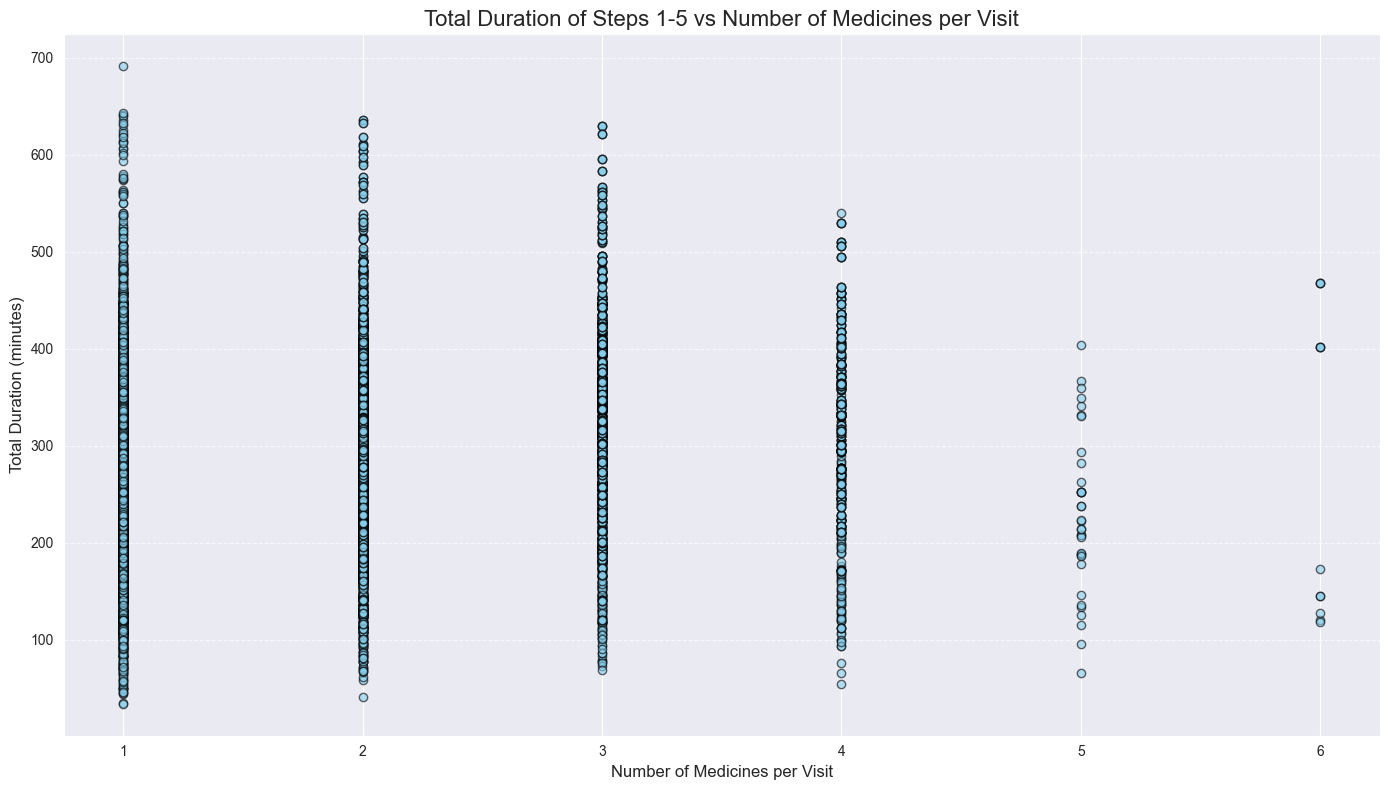

In [29]:
# Calculate the number of medicines per visit
df2['med_count'] = df2.groupby('visit_id')['medication_name'].transform('count')

# Calculate the sum of steps 1-5 for each row
df2['steps_sum'] = df2[['1', '2', '3', '4', '5']].sum(axis=1)

# Plot the data
plt.figure(figsize=(14, 8))
plt.scatter(df2['med_count'], df2['steps_sum'], alpha=0.6, color='skyblue', edgecolor='black')

# Add labels and improve aesthetics
plt.title("Total Duration of Steps 1-5 vs Number of Medicines per Visit", fontsize=16)
plt.xlabel("Number of Medicines per Visit", fontsize=12)
plt.ylabel("Total Duration (minutes)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

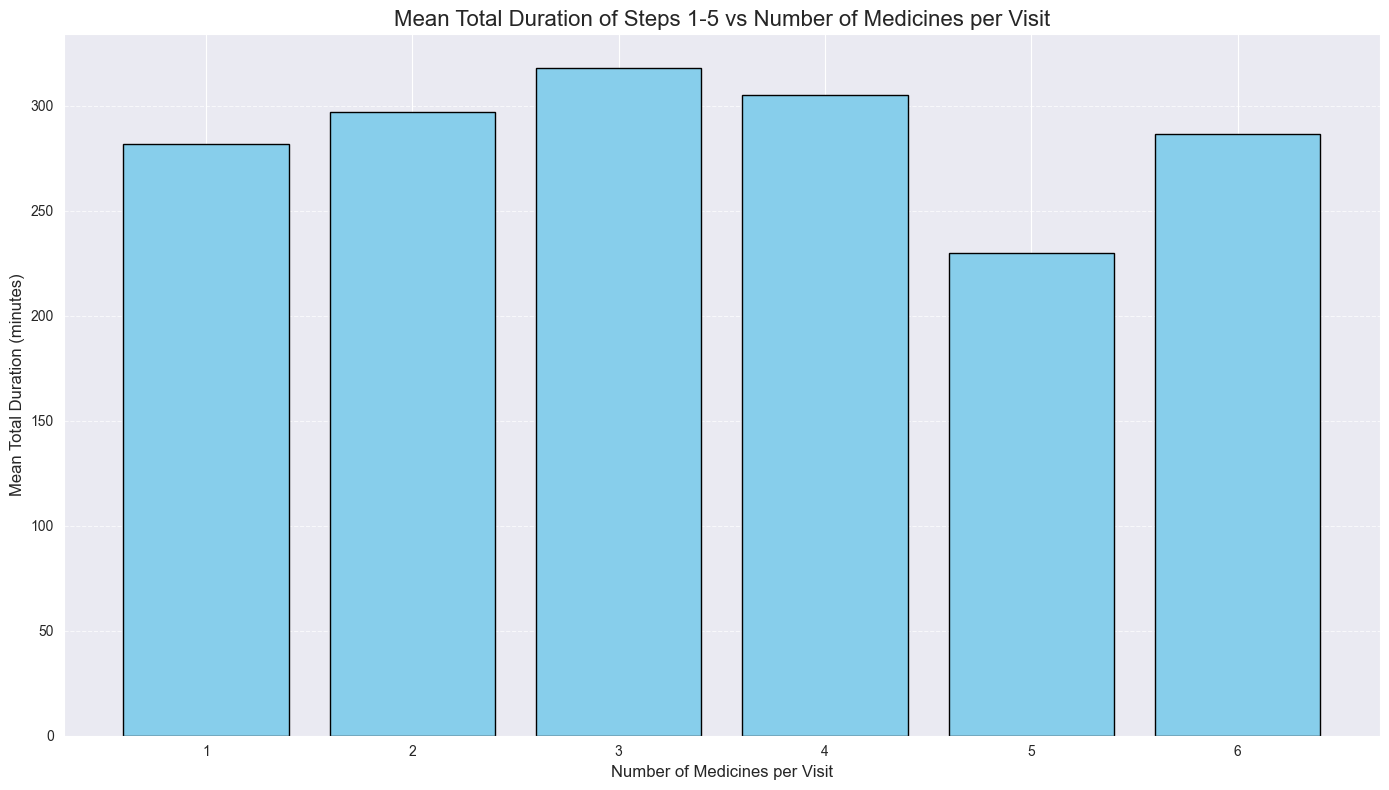

In [30]:
# Calculate the sum of steps 1-5 for each row
df2['steps_sum'] = df2[['1', '2', '3', '4', '5']].sum(axis=1)

# Group by the number of medicines and calculate the mean of steps_sum
mean_duration = df2.groupby('med_count')['steps_sum'].mean().reset_index()

# Plot the histogram
plt.figure(figsize=(14, 8))
plt.bar(mean_duration['med_count'], mean_duration['steps_sum'], color='skyblue', edgecolor='black')

# Add labels and improve aesthetics
plt.title("Mean Total Duration of Steps 1-5 vs Number of Medicines per Visit", fontsize=16)
plt.xlabel("Number of Medicines per Visit", fontsize=12)
plt.ylabel("Mean Total Duration (minutes)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()